### TASK 0: Import of recquired libraries

In [8]:
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json
import skimage as ski
import ipywidgets as widgets
from IPython.display import display

### TASK 1: Load the data 

useful functions: 
- to load the data: 
  
  ```
  path = 'pathToData'
  v1_info = nib.load(path + 'YourName.nii.gz').header` --> extract header information 
  v1 = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata() --> get actual data
  
  ```
  
  `print(v1_info)`

- extract pixel dimensions from v1_info \
  `print(v1_info['pixdim'])`


In [9]:
#Your code here
path = 'MR_phantom_data'
v1_info = nib.load(path + '/A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').header # Load the header of the image
v1 = nib.load(path + '/A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()

In [10]:
print(v1_info)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 224 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.3    0.7422 0.7422 0.1    0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=4;Time=102145.000'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -137.18927
qoffset_y       : -167.13531
qoffset_z 

In [11]:
print(v1_info['pixdim'])

[1.     1.3    0.7422 0.7422 0.1    0.     0.     0.    ]


In [12]:
print("unit of x, y, z: ", v1_info['pixdim'][1:4])

unit of x, y, z:  [1.3    0.7422 0.7422]


### TASK 2 & 3: Visualize

**hint:** the landmark tube is found in the axial slice 50 and in the coronal slice 145

**useful functions** 
- to get the images in the right view you might want to use rotations and transformations
`plt.imshow(ski.transform.rotate(i_coronal.T , angle), cmap='gray', aspect=...)`





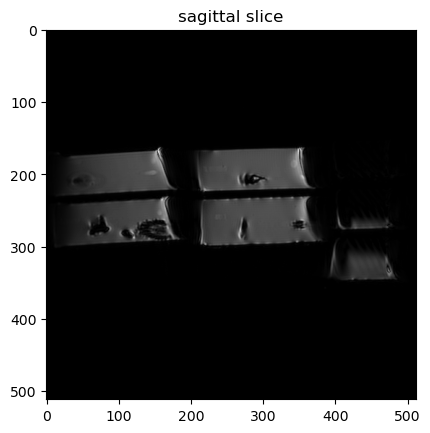

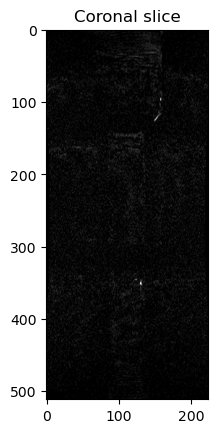

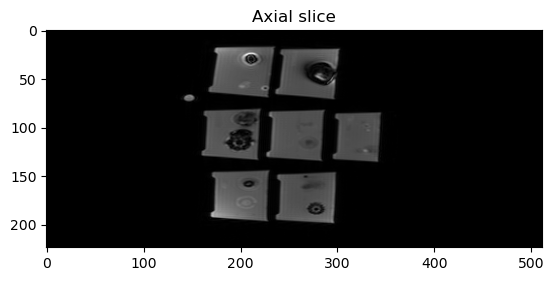

In [13]:
from skimage.transform import rotate
# your code here
sagittal_slice = 155
coronal_slice = 367 # 140
axial_slice = 50

# sagittal slice
plt.imshow(v1[sagittal_slice,:,:], cmap='gray')
plt.title('sagittal slice')
plt.show()

# coronal slice
v1_coronal_slice_rotated = np.rot90(v1[:,coronal_slice,:])
v1_coronal_slice_rotated_flipped = np.flip(v1_coronal_slice_rotated, axis=1)
plt.imshow(v1_coronal_slice_rotated_flipped, cmap='gray')
plt.title('Coronal slice')
plt.show()

# Axial slice
plt.imshow(v1[:,:,axial_slice], cmap='gray')
plt.title('Axial slice')
plt.show()

Rotated image made as a globally name

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Set up the slices
sagittal_slice = 115  # marker from hint 68
coronal_slice = 189    # Our B5: 189. Marker from hint 148
axial_slice = 453      # Our B5: 453. Marker from hint 50

# Number of slices for each axis
sagittal_num_slices = v1.shape[0]
coronal_num_slices = v1.shape[1]
axial_num_slices = v1.shape[2]

# Preprocess the rotated and flipped slices for each slice of the volume
v1_sagittal_all_slices = [np.flip(np.rot90(v1[i, :, :]), axis=1) for i in range(sagittal_num_slices)]
v1_coronal_all_slices = [np.flip(np.rot90(v1[:, i, :]), axis=1) for i in range(coronal_num_slices)]
v1_axial_all_slices = [np.flip(np.rot90(v1[:, :, i]), axis=1) for i in range(axial_num_slices)]

# Create functions that update the displayed slice for each view
def sagittal_plot_slice(slice_idx):
    plt.imshow(v1_sagittal_all_slices[slice_idx], cmap='gray')
    plt.title(f'Sagittal Slice {slice_idx} (Rotated and Flipped)')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.show()

def coronal_plot_slice(slice_idx):
    plt.imshow(v1_coronal_all_slices[slice_idx], cmap='gray')
    plt.title(f'Coronal Slice {slice_idx} (Rotated and Flipped)')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.show()

def axial_plot_slice(slice_idx):
    plt.imshow(v1_axial_all_slices[slice_idx], cmap='gray')
    plt.title(f'Axial Slice {slice_idx} (Rotated and Flipped)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(value=sagittal_slice, min=0, max=sagittal_num_slices-1, step=1, description='Sagittal Slice:')
coronal_slice_slider = widgets.IntSlider(value=coronal_slice, min=0, max=coronal_num_slices-1, step=1, description='Coronal Slice:')
axial_slice_slider = widgets.IntSlider(value=axial_slice, min=0, max=axial_num_slices-1, step=1, description='Axial Slice:')

# Create interactive plots for each view
sagittal_interactive_plot = widgets.interactive(sagittal_plot_slice, slice_idx=sagittal_slice_slider)
coronal_interactive_plot = widgets.interactive(coronal_plot_slice, slice_idx=coronal_slice_slider)
axial_interactive_plot = widgets.interactive(axial_plot_slice, slice_idx=axial_slice_slider)

# Display each interactive plot separately with its own slider
display(sagittal_interactive_plot)
display(coronal_interactive_plot)
display(axial_interactive_plot)

interactive(children=(IntSlider(value=115, description='Sagittal Slice:', max=223), Output()), _dom_classes=('…

interactive(children=(IntSlider(value=189, description='Coronal Slice:', max=511), Output()), _dom_classes=('w…

interactive(children=(IntSlider(value=453, description='Axial Slice:', max=511), Output()), _dom_classes=('wid…

#### with correct Cartesian Coordinate System

In [15]:
### TASK 0: Import of required libraries
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### TASK 1: Load the data 

# Define the path to the data
path = 'MR_phantom_data'
nifti_file = 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz'

# Load the NIfTI image and extract data
v1_img = nib.load(f'{path}/{nifti_file}')
v1 = v1_img.get_fdata()
v1_info = v1_img.header

# Print header information and pixel dimensions (optional)
print(v1_info)
print(v1_info['pixdim'])
print("unit of x, y, z: ", v1_info['pixdim'][1:4])

### TASK 2 & 3: Visualize Slices without Rotation and Flipping

# Define initial slice indices
sagittal_slice = 71  # Marker fra hint 68
coronal_slice = 150    # Our B5: 189. Marker fra hint 148
axial_slice = 62      # Our B5: 453. Marker fra hint 50

# Number of slices for each axis
sagittal_num_slices = v1.shape[0]
coronal_num_slices = v1.shape[1]
axial_num_slices = v1.shape[2]

# Preprocess the slices without rotation and flipping
v1_sagittal_all_slices = [np.flip(v1[i, :, :], axis=0) for i in range(sagittal_num_slices)]
v1_coronal_all_slices = [np.flip(v1[:, i, :], axis=0) for i in range(coronal_num_slices)]
v1_axial_all_slices = [np.flip(v1[:, :, i], axis=0) for i in range(axial_num_slices)]

### TASK 4: Interactive Sliders for Slices

# Create Output widgets for each plot
out_sagittal = widgets.Output()
out_coronal = widgets.Output()
out_axial = widgets.Output()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(
    value=sagittal_slice,
    min=0,
    max=sagittal_num_slices - 1,
    step=1,
    description='Sagittal Slice:',
    continuous_update=False
)

coronal_slice_slider = widgets.IntSlider(
    value=coronal_slice,
    min=0,
    max=coronal_num_slices - 1,
    step=1,
    description='Coronal Slice:',
    continuous_update=False
)

axial_slice_slider = widgets.IntSlider(
    value=axial_slice,
    min=0,
    max=axial_num_slices - 1,
    step=1,
    description='Axial Slice:',
    continuous_update=False
)

# Define functions to update plots
def sagittal_plot_slice(slice_idx):
    with out_sagittal:
        out_sagittal.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_sagittal_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Sagittal Slice {slice_idx}')
        plt.xlabel('Y-axis')
        plt.ylabel('Z-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

def coronal_plot_slice(slice_idx):
    with out_coronal:
        out_coronal.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_coronal_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Coronal Slice {slice_idx}')
        plt.xlabel('X-axis')
        plt.ylabel('Z-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

def axial_plot_slice(slice_idx):
    with out_axial:
        out_axial.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_axial_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Axial Slice {slice_idx}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

# Link the plotting functions to the sliders
widgets.interactive(sagittal_plot_slice, slice_idx=sagittal_slice_slider)
widgets.interactive(coronal_plot_slice, slice_idx=coronal_slice_slider)
widgets.interactive(axial_plot_slice, slice_idx=axial_slice_slider)

# Display the sliders and output plots
display(widgets.VBox([sagittal_slice_slider, out_sagittal]))
display(widgets.VBox([coronal_slice_slider, out_coronal]))
display(widgets.VBox([axial_slice_slider, out_axial]))

# Initialize the plots
sagittal_plot_slice(sagittal_slice)
coronal_plot_slice(coronal_slice)
axial_plot_slice(axial_slice)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 224 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.3    0.7422 0.7422 0.1    0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=4;Time=102145.000'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -137.18927
qoffset_y       : -167.13531
qoffset_z 

Finding the landmark

Our box, B5

In [16]:
### TASK 0: Import of required libraries
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### TASK 1: Load the data 

# Define the path to the data
path = 'MR_phantom_data'
nifti_file = 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz'

# Load the NIfTI image and extract data
v1_img = nib.load(f'{path}/{nifti_file}')
v1 = v1_img.get_fdata()
v1_info = v1_img.header

# Print header information and pixel dimensions (optional)
print(v1_info)
print(v1_info['pixdim'])
print("unit of x, y, z: ", v1_info['pixdim'][1:4])

### TASK 2 & 3: Visualize Slices without Rotation and Flipping

# Define initial slice indices
sagittal_slice = 115  # Marker fra hint 68
coronal_slice = 189    # Our B5: 189. Marker fra hint 148
axial_slice = 453      # Our B5: 453. Marker fra hint 50

# Number of slices for each axis
sagittal_num_slices = v1.shape[0]
coronal_num_slices = v1.shape[1]
axial_num_slices = v1.shape[2]

# Preprocess the slices without rotation and flipping
v1_sagittal_all_slices = [np.flip(v1[i, :, :], axis=0) for i in range(sagittal_num_slices)]
v1_coronal_all_slices = [np.flip(v1[:, i, :], axis=0) for i in range(coronal_num_slices)]
v1_axial_all_slices = [np.flip(v1[:, :, i], axis=0) for i in range(axial_num_slices)]

### TASK 4: Interactive Sliders for Slices

# Create Output widgets for each plot
out_sagittal = widgets.Output()
out_coronal = widgets.Output()
out_axial = widgets.Output()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(
    value=sagittal_slice,
    min=0,
    max=sagittal_num_slices - 1,
    step=1,
    description='Sagittal Slice:',
    continuous_update=False
)

coronal_slice_slider = widgets.IntSlider(
    value=coronal_slice,
    min=0,
    max=coronal_num_slices - 1,
    step=1,
    description='Coronal Slice:',
    continuous_update=False
)

axial_slice_slider = widgets.IntSlider(
    value=axial_slice,
    min=0,
    max=axial_num_slices - 1,
    step=1,
    description='Axial Slice:',
    continuous_update=False
)

# Define functions to update plots
def sagittal_plot_slice(slice_idx):
    with out_sagittal:
        out_sagittal.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_sagittal_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Sagittal Slice {slice_idx}')
        plt.xlabel('Y-axis')
        plt.ylabel('Z-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

def coronal_plot_slice(slice_idx):
    with out_coronal:
        out_coronal.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_coronal_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Coronal Slice {slice_idx}')
        plt.xlabel('X-axis')
        plt.ylabel('Z-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

def axial_plot_slice(slice_idx):
    with out_axial:
        out_axial.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_axial_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Axial Slice {slice_idx}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

# Link the plotting functions to the sliders
widgets.interactive(sagittal_plot_slice, slice_idx=sagittal_slice_slider)
widgets.interactive(coronal_plot_slice, slice_idx=coronal_slice_slider)
widgets.interactive(axial_plot_slice, slice_idx=axial_slice_slider)

# Display the sliders and output plots
display(widgets.VBox([sagittal_slice_slider, out_sagittal]))
display(widgets.VBox([coronal_slice_slider, out_coronal]))
display(widgets.VBox([axial_slice_slider, out_axial]))

# Initialize the plots
sagittal_plot_slice(sagittal_slice)
coronal_plot_slice(coronal_slice)
axial_plot_slice(axial_slice)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 224 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.3    0.7422 0.7422 0.1    0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=4;Time=102145.000'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -137.18927
qoffset_y       : -167.13531
qoffset_z 

### TASK 4 & 5: Crop out your groups phantom and visualize

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Replace these values with the actual indices for your phantom, look at the NOT rotated and flipped image!
x_min = 30  # Minimum x-index
x_max = 200  # Maximum x-index
y_min = 140  # Minimum y-index
y_max = 220  # Maximum y-index
z_min = 380  # Minimum z-index
z_max = 490  # Maximum z-index

# Crop the data
v1_cropped = v1[x_min:x_max, y_min:y_max, z_min:z_max]

# Number of slices for each axis in the cropped data
sagittal_num_slices = v1_cropped.shape[0]
coronal_num_slices = v1_cropped.shape[1]
axial_num_slices = v1_cropped.shape[2]

# Set up the slices (adjust based on your phantom's location)
sagittal_slice = 107
coronal_slice = 52
axial_slice = 62

# Preprocess the rotated and flipped slices for each slice of the cropped volume
v1_sagittal_all_slices = [np.flip(np.rot90(v1_cropped[i, :, :]), axis=1) for i in range(sagittal_num_slices)]
v1_coronal_all_slices = [np.flip(np.rot90(v1_cropped[:, i, :]), axis=1) for i in range(coronal_num_slices)]
v1_axial_all_slices = [np.flip(np.rot90(v1_cropped[:, :, i]), axis=1) for i in range(axial_num_slices)]

# Create functions that update the displayed slice for each view
def sagittal_plot_slice(slice_idx):
    plt.imshow(v1_sagittal_all_slices[slice_idx], cmap='gray')
    plt.title(f'Sagittal Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.show()

def coronal_plot_slice(slice_idx):
    plt.imshow(v1_coronal_all_slices[slice_idx], cmap='gray')
    plt.title(f'Coronal Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.show()

def axial_plot_slice(slice_idx):
    plt.imshow(v1_axial_all_slices[slice_idx], cmap='gray')
    plt.title(f'Axial Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(value=sagittal_slice, min=0, max=sagittal_num_slices - 1, step=1, description='Sagittal Slice:')
coronal_slice_slider = widgets.IntSlider(value=coronal_slice, min=0, max=coronal_num_slices - 1, step=1, description='Coronal Slice:')
axial_slice_slider = widgets.IntSlider(value=axial_slice, min=0, max=axial_num_slices - 1, step=1, description='Axial Slice:')

# Create interactive plots for each view
sagittal_interactive_plot = widgets.interactive(sagittal_plot_slice, slice_idx=sagittal_slice_slider)
coronal_interactive_plot = widgets.interactive(coronal_plot_slice, slice_idx=coronal_slice_slider)
axial_interactive_plot = widgets.interactive(axial_plot_slice, slice_idx=axial_slice_slider)

# Display each interactive plot separately with its own slider
display(sagittal_interactive_plot)
display(coronal_interactive_plot)
display(axial_interactive_plot)

interactive(children=(IntSlider(value=107, description='Sagittal Slice:', max=169), Output()), _dom_classes=('…

interactive(children=(IntSlider(value=52, description='Coronal Slice:', max=79), Output()), _dom_classes=('wid…

interactive(children=(IntSlider(value=62, description='Axial Slice:', max=109), Output()), _dom_classes=('widg…

With Cartesian coordinate system

In [18]:
### TASK 0: Import of required libraries
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

### TASK 1: Load the data 

# Define the path to the data
path = 'MR_phantom_data'
nifti_file = 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz'

# Load the NIfTI image and extract data
v1_img = nib.load(f'{path}/{nifti_file}')
v1 = v1_img.get_fdata()
v1_info = v1_img.header

# Print header information and pixel dimensions (optional)
print(v1_info)
print(v1_info['pixdim'])
print("unit of x, y, z: ", v1_info['pixdim'][1:4])

### TASK 2 & 3: Visualize Slices without Rotation and Flipping

# Replace these values with the actual indices for your phantom, look at the NOT rotated and flipped image!
x_min = 30  # Minimum x-index
x_max = 200  # Maximum x-index
y_min = 140  # Minimum y-index
y_max = 220  # Maximum y-index
z_min = 380  # Minimum z-index
z_max = 490  # Maximum z-index

# Crop the data
v1_cropped = v1[x_min:x_max, y_min:y_max, z_min:z_max]

# Number of slices for each axis in the cropped data
sagittal_num_slices = v1_cropped.shape[0]
coronal_num_slices = v1_cropped.shape[1]
axial_num_slices = v1_cropped.shape[2]

# Set up the initial slice indices (adjust based on your phantom's location)
sagittal_slice = 107
coronal_slice = 52
axial_slice = 62

# Preprocess the slices without rotation and flipping
# Beholder den oprindelige orientering
v1_sagittal_all_slices = [np.flip(v1_cropped[i, :, :], axis=0) for i in range(sagittal_num_slices)]
v1_coronal_all_slices = [np.flip(v1_cropped[:, i, :], axis=0) for i in range(coronal_num_slices)]
v1_axial_all_slices = [np.flip(v1_cropped[:, :, i], axis=0) for i in range(axial_num_slices)]

### TASK 4: Interactive Sliders for Slices with Cartesian Coordinates

# Create Output widgets for each plot
out_sagittal = widgets.Output()
out_coronal = widgets.Output()
out_axial = widgets.Output()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(
    value=sagittal_slice,
    min=0,
    max=sagittal_num_slices - 1,
    step=1,
    description='Sagittal Slice:',
    continuous_update=False
)

coronal_slice_slider = widgets.IntSlider(
    value=coronal_slice,
    min=0,
    max=coronal_num_slices - 1,
    step=1,
    description='Coronal Slice:',
    continuous_update=False
)

axial_slice_slider = widgets.IntSlider(
    value=axial_slice,
    min=0,
    max=axial_num_slices - 1,
    step=1,
    description='Axial Slice:',
    continuous_update=False
)

# Define functions to update plots
def sagittal_plot_slice(slice_idx):
    with out_sagittal:
        out_sagittal.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_sagittal_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Sagittal Slice (cropped) {slice_idx}')
        plt.xlabel('Y-axis / (Anterior)')
        plt.ylabel('Z-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

def coronal_plot_slice(slice_idx):
    with out_coronal:
        out_coronal.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_coronal_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Coronal Slice (cropped) {slice_idx}')
        plt.xlabel('X-axis')
        plt.ylabel('Z-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

def axial_plot_slice(slice_idx):
    with out_axial:
        out_axial.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transponér for korrekt orientering
        plt.imshow(v1_axial_all_slices[slice_idx].T, cmap='gray', origin='lower')
        plt.title(f'Axial Slice (cropped) {slice_idx}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.axis('on')  # Vis akseticks for Cartesian koordinater
        plt.show()

# Link the plotting functions to the sliders
sagittal_interactive_plot = widgets.interactive(
    sagittal_plot_slice,
    slice_idx=sagittal_slice_slider
)
coronal_interactive_plot = widgets.interactive(
    coronal_plot_slice,
    slice_idx=coronal_slice_slider
)
axial_interactive_plot = widgets.interactive(
    axial_plot_slice,
    slice_idx=axial_slice_slider
)

# Display the sliders and output plots
display(widgets.VBox([sagittal_slice_slider, out_sagittal]))
display(widgets.VBox([coronal_slice_slider, out_coronal]))
display(widgets.VBox([axial_slice_slider, out_axial]))

# Initialize the plots
sagittal_plot_slice(sagittal_slice)
coronal_plot_slice(coronal_slice)
axial_plot_slice(axial_slice)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 224 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.3    0.7422 0.7422 0.1    0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=4;Time=102145.000'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -137.18927
qoffset_y       : -167.13531
qoffset_z 

In [19]:
### TASK 0: Import of required libraries
# Import the required libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import json

### TASK 1: Load the data 

# Define the path to the data
path = 'MR_phantom_data'
nifti_file = 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz'

# Load the NIfTI image and extract data
v1_img = nib.load(f'{path}/{nifti_file}')
v1 = v1_img.get_fdata()
v1_info = v1_img.header

# Print header information and pixel dimensions (optional)
print(v1_info)
print(v1_info['pixdim'])
print("unit of x, y, z: ", v1_info['pixdim'][1:4])

### TASK 2 & 3: Visualize Slices without Rotation and Flipping

# Replace these values with the actual indices for your phantom, look at the NOT rotated and flipped image!
x_min = 30   # Minimum x-index
x_max = 200  # Maximum x-index
y_min = 140  # Minimum y-index
y_max = 220  # Maximum y-index
z_min = 380  # Minimum z-index
z_max = 490  # Maximum z-index

# Crop the data
v1_cropped = v1[x_min:x_max, y_min:y_max, z_min:z_max]

# Number of slices for each axis in the cropped data
sagittal_num_slices = v1_cropped.shape[0]
coronal_num_slices = v1_cropped.shape[1]
axial_num_slices = v1_cropped.shape[2]

# Set up the initial slice indices (adjust based on your phantom's location)
sagittal_slice = 107
coronal_slice = 52
axial_slice = 62

# Preprocess the slices without rotation and flipping
# Beholder den oprindelige orientering
v1_sagittal_all_slices = [np.flip(v1_cropped[i, :, :], axis=0) for i in range(sagittal_num_slices)]
v1_coronal_all_slices = [np.flip(v1_cropped[:, i, :], axis=0) for i in range(coronal_num_slices)]
v1_axial_all_slices = [np.flip(v1_cropped[:, :, i], axis=0) for i in range(axial_num_slices)]

### TASK 4: Interactive Sliders for Slices with Cartesian Coordinates

# Create Output widgets for each plot
out_sagittal = widgets.Output()
out_coronal = widgets.Output()
out_axial = widgets.Output()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(
    value=sagittal_slice,
    min=0,
    max=sagittal_num_slices - 1,
    step=1,
    description='Sagittal Slice:',
    continuous_update=False
)

coronal_slice_slider = widgets.IntSlider(
    value=coronal_slice,
    min=0,
    max=coronal_num_slices - 1,
    step=1,
    description='Coronal Slice:',
    continuous_update=False
)

axial_slice_slider = widgets.IntSlider(
    value=axial_slice,
    min=0,
    max=axial_num_slices - 1,
    step=1,
    description='Axial Slice:',
    continuous_update=False
)

# Define functions to update plots with scale bars
def sagittal_plot_slice(slice_idx):
    with out_sagittal:
        out_sagittal.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transpose for correct orientation
        plt.imshow(v1_sagittal_all_slices[slice_idx].T, cmap='gray', origin='lower', aspect='equal')
        plt.title(f'Sagittal Slice (cropped) {slice_idx}')
        plt.xlabel('<- Anterior | Y-axis | Posterior ->')
        plt.ylabel('<- Inferior | Z-axis | Superior ->')
        plt.axis('on')  # Show axis ticks for Cartesian coordinates

        # Add scale bar
        # Each pixel in Y and Z axes represents 0.7422 mm
        # 3 cm = 30 mm; 30 / 0.7422 ≈ 40 pixels
        scale_length_px = int(30 / 0.7422)  # ≈40 pixels
        padding = 10  # pixels from the edge
        plt.plot([padding, padding + scale_length_px], [padding, padding], color='red', linewidth=2)
        plt.text(padding + scale_length_px / 2, padding + 5, '3 cm', color='red', ha='center', va='bottom')

        # Add grid
        plt.grid(color='red', linestyle='--', linewidth=0.5)
        plt.show()

def coronal_plot_slice(slice_idx):
    with out_coronal:
        out_coronal.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transpose for correct orientation
        plt.imshow(v1_coronal_all_slices[slice_idx].T, cmap='gray', origin='lower', aspect='equal')
        plt.title(f'Coronal Slice (cropped) {slice_idx}')
        plt.xlabel('<- Right (lateral) | X-axis | Left (lateral) ->')
        plt.ylabel('<- Inferior | Z-axis | Superior ->')
        plt.axis('on')  # Show axis ticks for Cartesian coordinates

        # Add scale bar
        # X-axis represents 1.3 mm/pixel; 3 cm = 30 mm; 30 /1.3 ≈23 pixels
        scale_length_px = int(30 / 1.3)  # ≈23 pixels
        padding = 10  # pixels from the edge
        plt.plot([padding, padding + scale_length_px], [padding, padding], color='red', linewidth=2)
        plt.text(padding + scale_length_px / 2, padding + 5, '3 cm', color='red', ha='center', va='bottom')

        # Add grid
        plt.grid(color='red', linestyle='--', linewidth=0.5)
        plt.show()

def axial_plot_slice(slice_idx):
    with out_axial:
        out_axial.clear_output(wait=True)
        plt.figure(figsize=(5, 5))
        # Transpose for correct orientation
        plt.imshow(v1_axial_all_slices[slice_idx].T, cmap='gray', origin='lower', aspect='equal')
        plt.title(f'Axial Slice (cropped) {slice_idx}')
        plt.xlabel('<- Right (lateral) | X-axis | Left (lateral) ->')
        plt.ylabel('<- Anterior | Y-axis | Posterior ->')
        plt.axis('on')  # Show axis ticks for Cartesian coordinates

        # Add scale bar
        # X-axis represents 1.3 mm/pixel; 3 cm = 30 mm; 30 /1.3 ≈23 pixels
        scale_length_px = int(30 / 1.3)  # ≈23 pixels
        padding = 10  # pixels from the edge
        plt.plot([padding, padding + scale_length_px], [padding, padding], color='red', linewidth=2)
        plt.text(padding + scale_length_px / 2, padding + 5, '3 cm', color='red', ha='center', va='bottom')

        # Add grid
        plt.grid(color='red', linestyle='--', linewidth=0.5)
        plt.show()

# Link the plotting functions to the sliders
sagittal_interactive_plot = widgets.interactive(
    sagittal_plot_slice,
    slice_idx=sagittal_slice_slider
)
coronal_interactive_plot = widgets.interactive(
    coronal_plot_slice,
    slice_idx=coronal_slice_slider
)
axial_interactive_plot = widgets.interactive(
    axial_plot_slice,
    slice_idx=axial_slice_slider
)

# Display the sliders and output plots
display(widgets.VBox([sagittal_slice_slider, out_sagittal]))
display(widgets.VBox([coronal_slice_slider, out_coronal]))
display(widgets.VBox([axial_slice_slider, out_axial]))

# Initialize the plots
sagittal_plot_slice(sagittal_slice)
coronal_plot_slice(coronal_slice)
axial_plot_slice(axial_slice)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 224 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.3    0.7422 0.7422 0.1    0.     0.     0.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=4;Time=102145.000'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -137.18927
qoffset_y       : -167.13531
qoffset_z 

### TASK 6: Load and display the 4 data sets acquired with different echo times TE and common TR=100ms

- use your cropped phantom coordinates

**useful code for plotting all images stacked horizontally into one image:** 

```
v1=nib.load('yourFile').get_fdata()
i1 = v1[:,:,slc]
...
plt.imshow(np.hstack([i1, i2, i3, i4]), cmap='gray') 
``` 
 

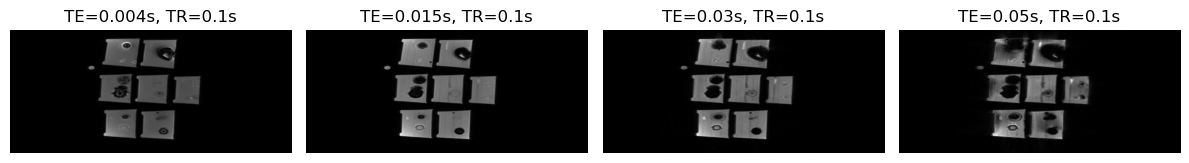

In [20]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json

# Path to the data
path = 'MR_phantom_data/'

# Function to load JSON file and extract TE and TR
def load_json_metadata(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    TE = data.get('EchoTime', 'Unknown')  # Echo Time in seconds
    TR = data.get('RepetitionTime', 'Unknown')  # Repetition Time in seconds
    return TE, TR

# Load NIfTI and corresponding JSON files
file_TE4ms = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()
TE4ms_info = load_json_metadata(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.json')

file_TE15ms = nib.load(path + 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz').get_fdata()
TE15ms_info = load_json_metadata(path + 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.json')

file_TE30ms = nib.load(path + 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz').get_fdata()
TE30ms_info = load_json_metadata(path + 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.json')

file_TE50ms = nib.load(path + 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz').get_fdata()
TE50ms_info = load_json_metadata(path + 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.json')

# Define a slice (axial, coronal, or sagittal) - example using axial slice
axial_slice = 50  # Adjust this as necessary for your data

# Extract the same axial slice from each dataset
slice_TE4ms = file_TE4ms[:, :, axial_slice]
slice_TE15ms = file_TE15ms[:, :, axial_slice]
slice_TE30ms = file_TE30ms[:, :, axial_slice]
slice_TE50ms = file_TE50ms[:, :, axial_slice]

# Plot all 4 slices in a single figure for comparison, with metadata in titles
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(slice_TE4ms, cmap='gray')
plt.title(f'TE={TE4ms_info[0]}s, TR={TE4ms_info[1]}s')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(slice_TE15ms, cmap='gray')
plt.title(f'TE={TE15ms_info[0]}s, TR={TE15ms_info[1]}s')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(slice_TE30ms, cmap='gray')
plt.title(f'TE={TE30ms_info[0]}s, TR={TE30ms_info[1]}s')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(slice_TE50ms, cmap='gray')
plt.title(f'TE={TE50ms_info[0]}s, TR={TE50ms_info[1]}s')
plt.axis('off')

plt.tight_layout()
plt.show()

With grid and pixel values

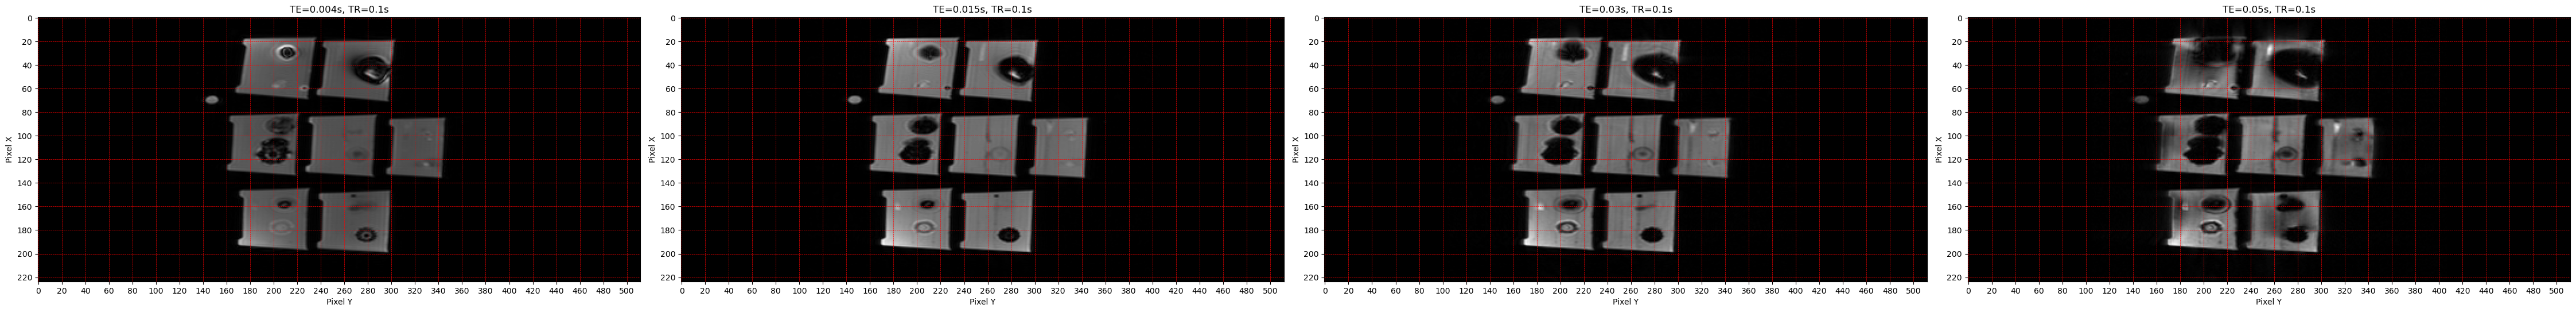

In [21]:
### **With grid and pixel values**
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import json

# Path to the data
path = 'MR_phantom_data/'

# Function to load JSON file and extract TE and TR
def load_json_metadata(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    TE = data.get('EchoTime', 'Unknown')  # Echo Time in seconds
    TR = data.get('RepetitionTime', 'Unknown')  # Repetition Time in seconds
    return TE, TR

# Load NIfTI and corresponding JSON files
file_TE4ms = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()
TE4ms_info = load_json_metadata(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.json')

file_TE15ms = nib.load(path + 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz').get_fdata()
TE15ms_info = load_json_metadata(path + 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.json')

file_TE30ms = nib.load(path + 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz').get_fdata()
TE30ms_info = load_json_metadata(path + 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.json')

file_TE50ms = nib.load(path + 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz').get_fdata()
TE50ms_info = load_json_metadata(path + 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.json')

# Define a slice (axial, coronal, or sagittal) - example using axial slice
axial_slice = 50  # Adjust this as necessary for your data

# Extract the same axial slice from each dataset
slice_TE4ms = file_TE4ms[:, :, axial_slice]
slice_TE15ms = file_TE15ms[:, :, axial_slice]
slice_TE30ms = file_TE30ms[:, :, axial_slice]
slice_TE50ms = file_TE50ms[:, :, axial_slice]

# Function to add pixel numbers and grid to images
def plot_with_grid(image, title, ax):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.set_xticks(np.arange(0, image.shape[1], 20))  # Grid interval on Y-axis
    ax.set_yticks(np.arange(0, image.shape[0], 20))  # Grid interval on X-axis
    ax.grid(color='red', linestyle='--', linewidth=0.5)  # Add gridlines
    ax.set_xlabel('Pixel Y')
    ax.set_ylabel('Pixel X')
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val)}'))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val)}'))

# Plot all 4 slices in a single figure for comparison, with pixel grid
fig, axs = plt.subplots(1, 4, figsize=(45, 18))

plot_with_grid(slice_TE4ms, f'TE={TE4ms_info[0]}s, TR={TE4ms_info[1]}s', axs[0])
plot_with_grid(slice_TE15ms, f'TE={TE15ms_info[0]}s, TR={TE15ms_info[1]}s', axs[1])
plot_with_grid(slice_TE30ms, f'TE={TE30ms_info[0]}s, TR={TE30ms_info[1]}s', axs[2])
plot_with_grid(slice_TE50ms, f'TE={TE50ms_info[0]}s, TR={TE50ms_info[1]}s', axs[3])

plt.tight_layout()
plt.show()

Putting it all together: cropped, rotated, different TE times and sliced

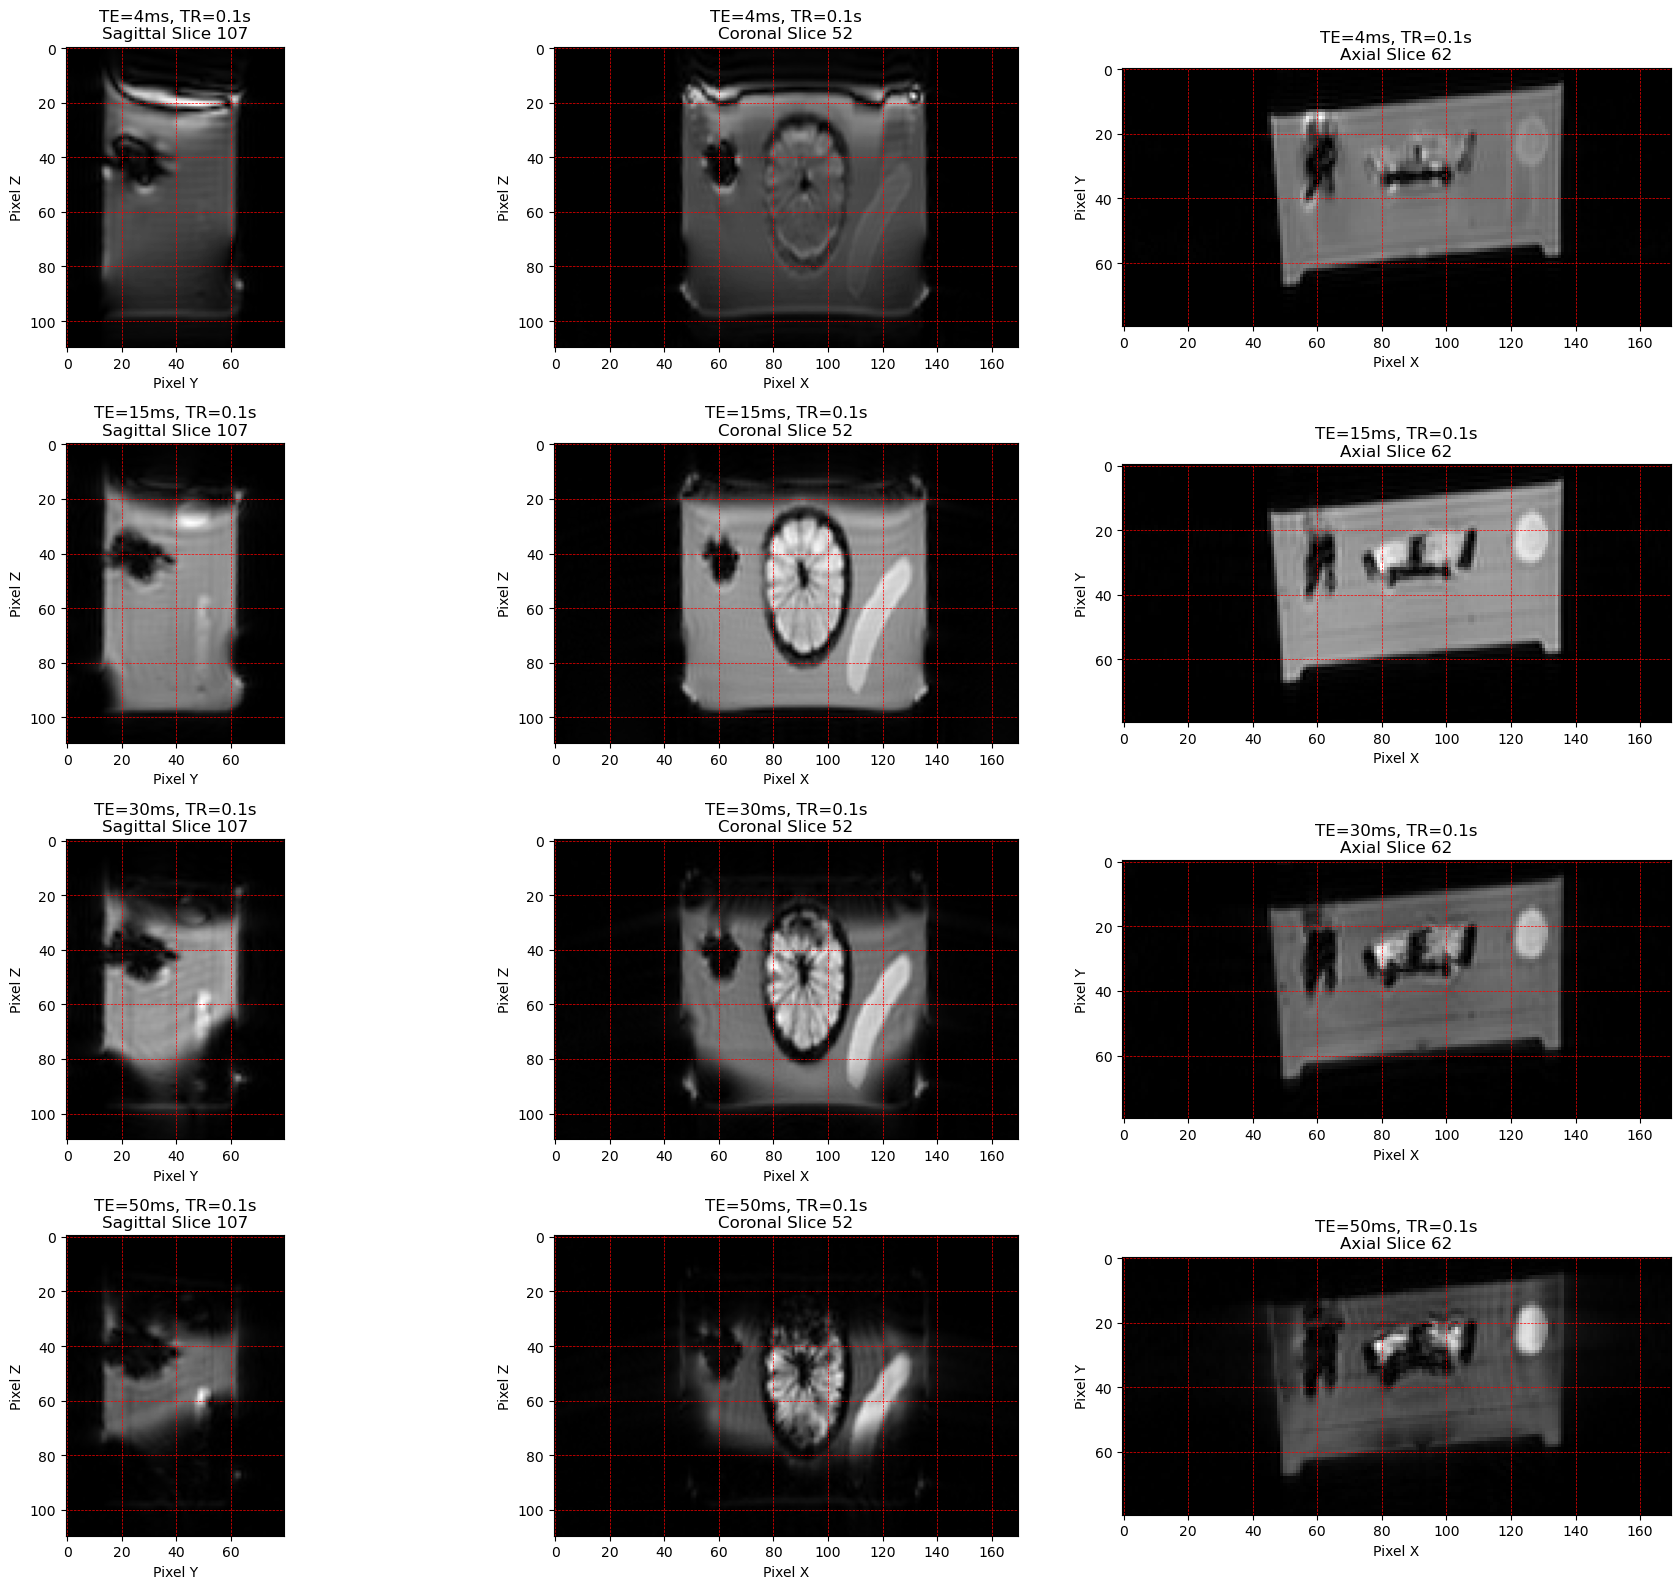

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import json

# ============================
# Step 1: Load and Preprocess Data for All Echo Times
# ============================

# Function to load JSON metadata
def load_json_metadata(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    TE = data.get('EchoTime', 'Unknown')  # Echo Time in seconds
    TR = data.get('RepetitionTime', 'Unknown')  # Repetition Time in seconds
    return TE, TR

# Path to the data
path = 'MR_phantom_data/'

# Dictionary to store data and metadata for each TE
echo_times = {
    'TE=4ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None
    },
    'TE=15ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None
    },
    'TE=30ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None
    },
    'TE=50ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None
    }
}

# Load data and metadata for each TE
for te_key, te_info in echo_times.items():
    # Load NIfTI data
    te_info['data'] = nib.load(path + te_info['nii_file']).get_fdata()
    
    # Load metadata
    te_info['TE'], te_info['TR'] = load_json_metadata(path + te_info['json_file'])

# ============================
# Step 2: Define Cropping Indices
# ============================

# Replace these values with the actual indices for your phantom.
# These indices should be determined based on inspecting the original (non-rotated and non-flipped) images.
x_min = 30   # Minimum x-index
x_max = 200  # Maximum x-index
y_min = 140  # Minimum y-index
y_max = 220  # Maximum y-index
z_min = 380  # Minimum z-index
z_max = 490  # Maximum z-index

# ============================
# Step 3: Crop and Preprocess Data for Each TE
# ============================

for te_key, te_info in echo_times.items():
    # Crop the data to focus on the region of interest
    te_info['cropped'] = te_info['data'][x_min:x_max, y_min:y_max, z_min:z_max]
    
    # Define initial slice indices within the cropped data
    # These should be adjusted based on the cropped region and desired initial view
    # For example, setting to the center slice
    sagittal_slice_init = 107
    coronal_slice_init = 52
    axial_slice_init = 62
    
    # Preprocess the rotated and flipped slices for each slice of the cropped volume
    # Rotation: 90 degrees counter-clockwise (np.rot90 with k=1)
    # Flip: Horizontal flip (np.fliplr)
    te_info['sagittal'] = [
        np.fliplr(np.rot90(te_info['cropped'][i, :, :], k=1)) for i in range(te_info['cropped'].shape[0])
    ]
    te_info['coronal'] = [
        np.fliplr(np.rot90(te_info['cropped'][:, i, :], k=1)) for i in range(te_info['cropped'].shape[1])
    ]
    te_info['axial'] = [
        np.fliplr(np.rot90(te_info['cropped'][:, :, i], k=1)) for i in range(te_info['cropped'].shape[2])
    ]
    
    # Store initial slice indices for each TE
    te_info['sagittal_init'] = sagittal_slice_init
    te_info['coronal_init'] = coronal_slice_init
    te_info['axial_init'] = axial_slice_init

# ============================
# Step 4: Define Plotting Function for 4x3 Grid
# ============================

def plot_all_echo_times(echo_times_dict):
    """
    Plots all four echo times in a 4x3 grid (4 rows for TEs and 3 columns for Sagittal, Coronal, Axial).
    
    Parameters:
    - echo_times_dict (dict): Dictionary containing data and metadata for each TE.
    """
    num_echo_times = len(echo_times_dict)
    fig, axs = plt.subplots(num_echo_times, 3, figsize=(18, 4 * num_echo_times))
    
    # If there's only one TE, axs might not be a 2D array
    if num_echo_times == 1:
        axs = np.expand_dims(axs, axis=0)
    
    for row_idx, (te_key, te_info) in enumerate(echo_times_dict.items()):
        # Define slice indices (using the initial slices)
        sagittal_idx = te_info['sagittal_init']
        coronal_idx = te_info['coronal_init']
        axial_idx = te_info['axial_init']
        
        # Retrieve the slices
        sagittal_slice = te_info['sagittal'][sagittal_idx]
        coronal_slice = te_info['coronal'][coronal_idx]
        axial_slice = te_info['axial'][axial_idx]
        
        # Plot Sagittal Slice
        ax = axs[row_idx, 0]
        im = ax.imshow(sagittal_slice, cmap='gray')
        ax.set_title(f'{te_key}, TR={te_info["TR"]}s\nSagittal Slice {sagittal_idx}')
        ax.set_xlabel('Pixel Y')
        ax.set_ylabel('Pixel Z')
        ax.set_xticks(np.arange(0, sagittal_slice.shape[1], 20))
        ax.set_yticks(np.arange(0, sagittal_slice.shape[0], 20))
        ax.grid(color='red', linestyle='--', linewidth=0.5)
        
        # Plot Coronal Slice
        ax = axs[row_idx, 1]
        im = ax.imshow(coronal_slice, cmap='gray')
        ax.set_title(f'{te_key}, TR={te_info["TR"]}s\nCoronal Slice {coronal_idx}')
        ax.set_xlabel('Pixel X')
        ax.set_ylabel('Pixel Z')
        ax.set_xticks(np.arange(0, coronal_slice.shape[1], 20))
        ax.set_yticks(np.arange(0, coronal_slice.shape[0], 20))
        ax.grid(color='red', linestyle='--', linewidth=0.5)
        
        # Plot Axial Slice
        ax = axs[row_idx, 2]
        im = ax.imshow(axial_slice, cmap='gray')
        ax.set_title(f'{te_key}, TR={te_info["TR"]}s\nAxial Slice {axial_idx}')
        ax.set_xlabel('Pixel X')
        ax.set_ylabel('Pixel Y')
        ax.set_xticks(np.arange(0, axial_slice.shape[1], 20))
        ax.set_yticks(np.arange(0, axial_slice.shape[0], 20))
        ax.grid(color='red', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()

# ============================
# Step 5: Execute the Plotting Function
# ============================

plot_all_echo_times(echo_times)

### TASK 7: Intensity profiles through phantom

**usefule code to plot an e.g. horizontal line** \
`plt.plot([0, 256], [120, 120], 'r--') `

Shape of the axial slices: (224, 512)


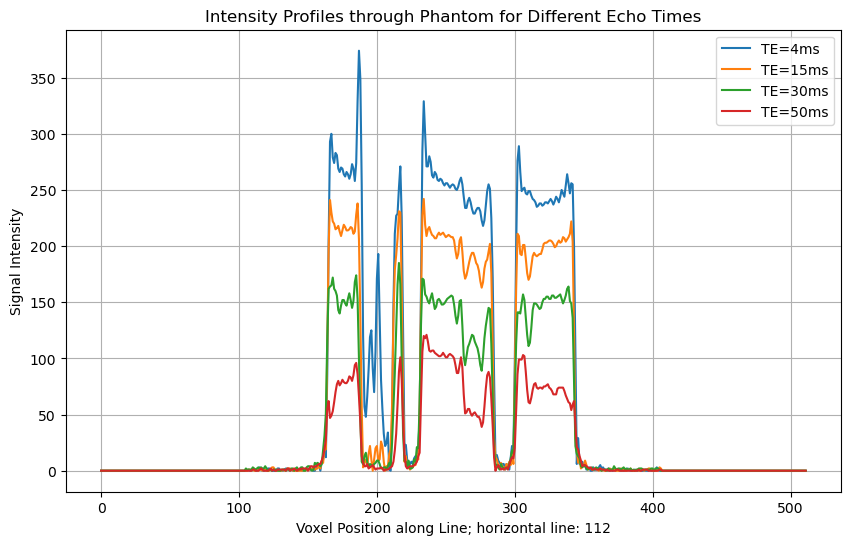

In [23]:
import matplotlib.pyplot as plt

# Check the shape of the slices you're working with
print("Shape of the axial slices:", slice_TE4ms.shape)

# Select a valid index within the range of the slice's shape (e.g., half of the second dimension)
line_idx = slice_TE4ms.shape[0] // 2 # This selects the central row in the image (central horizontal line)

# Extract intensity profiles along the chosen line for each TE
profile_TE4ms = slice_TE4ms[line_idx, :]
profile_TE15ms = slice_TE15ms[line_idx, :]
profile_TE30ms = slice_TE30ms[line_idx, :]
profile_TE50ms = slice_TE50ms[line_idx, :]

# Plot the intensity profiles for the 4 echo times
plt.figure(figsize=(10, 6))
plt.plot(profile_TE4ms, label='TE=4ms')
plt.plot(profile_TE15ms, label='TE=15ms')
plt.plot(profile_TE30ms, label='TE=30ms')
plt.plot(profile_TE50ms, label='TE=50ms')
plt.title('Intensity Profiles through Phantom for Different Echo Times')
plt.xlabel(f'Voxel Position along Line; horizontal line: {line_idx}')
plt.ylabel('Signal Intensity')
plt.legend()
plt.grid(True)
plt.show()

Improved version with more stuff

Shape of the sagittal slice: (110, 80)
Shape of the coronal slice: (110, 170)
Shape of the axial slice: (80, 170)


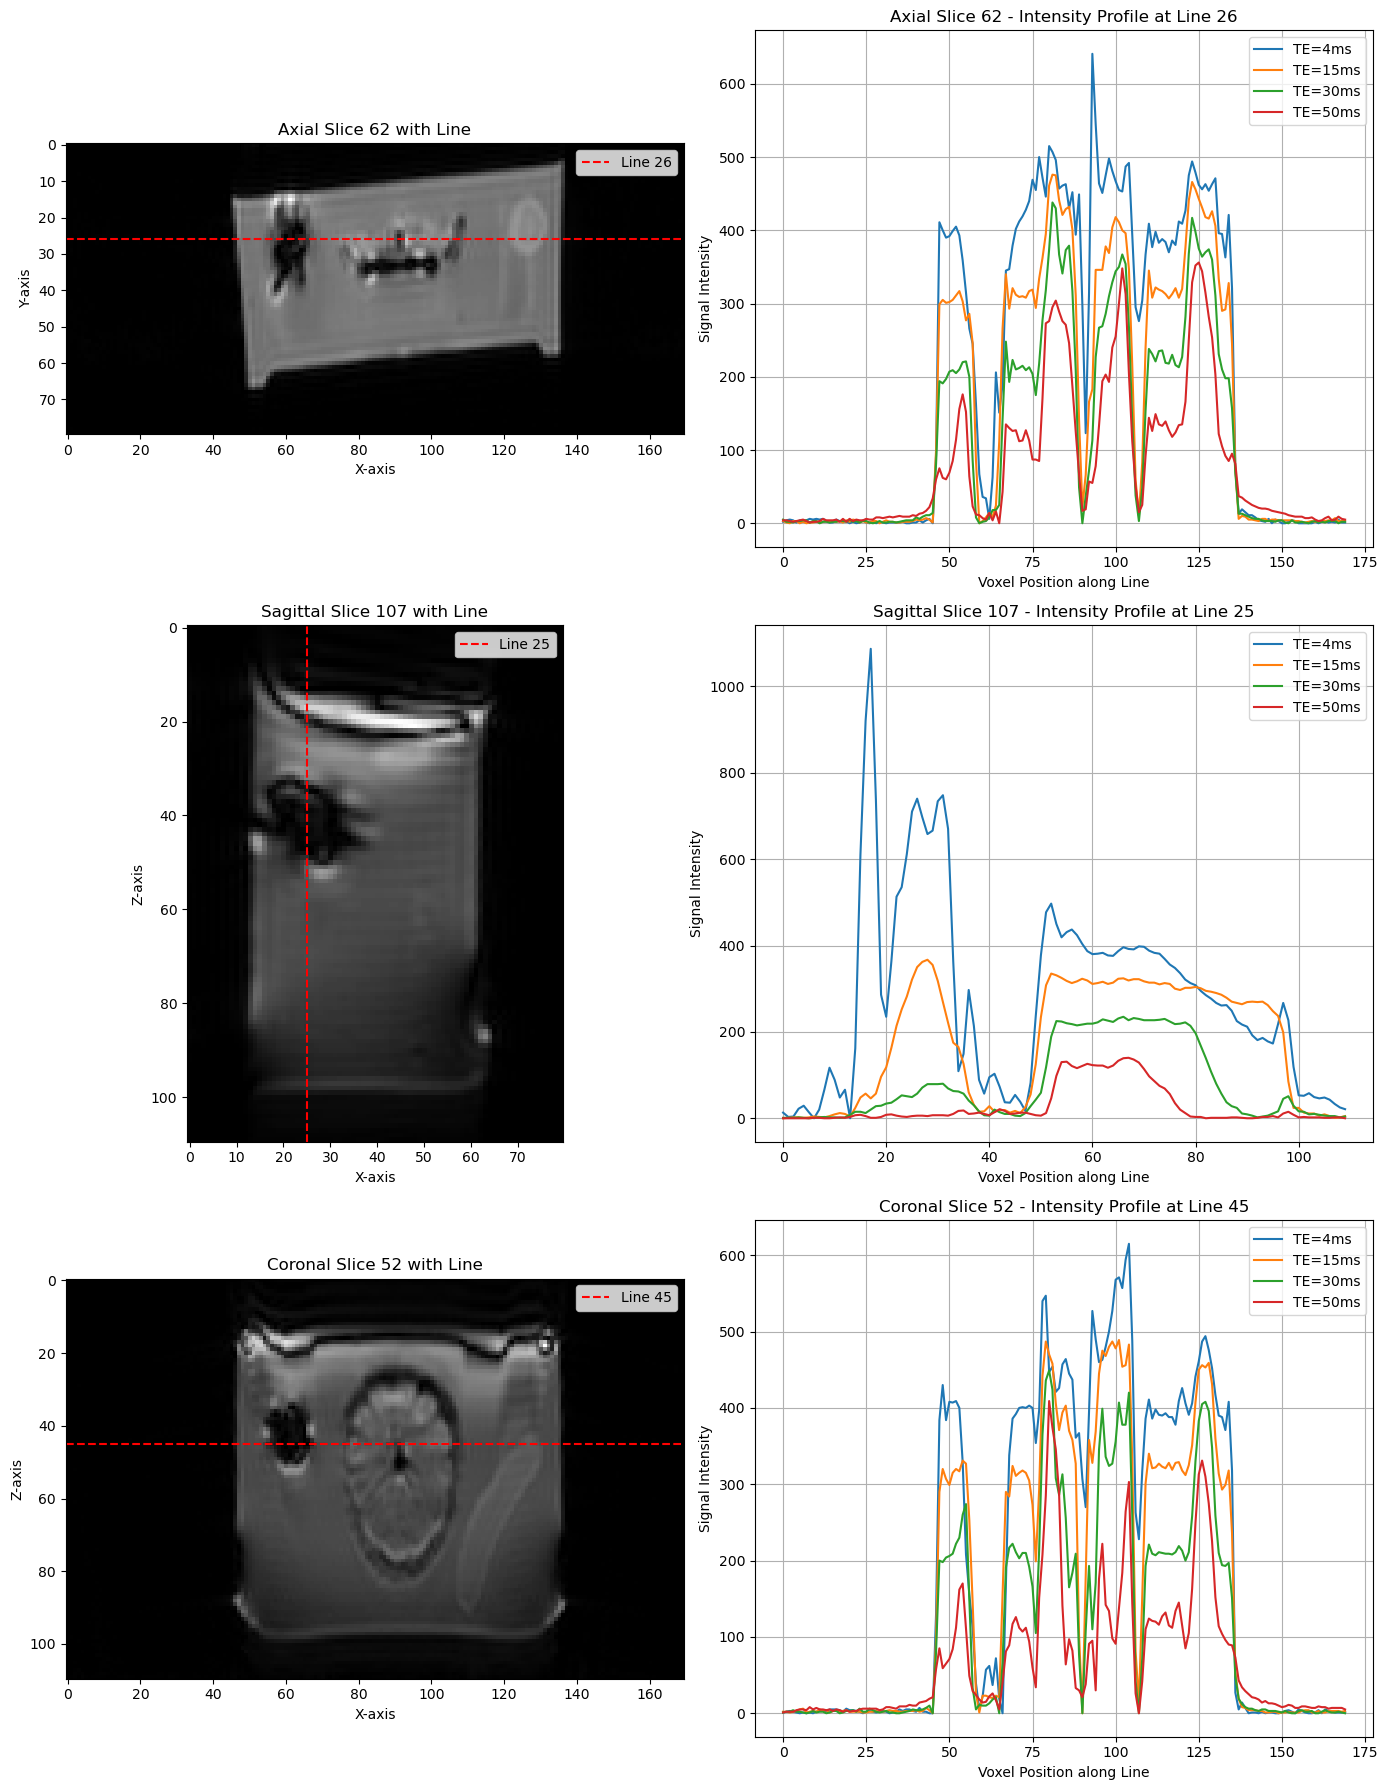

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import json

# ============================
# Step 1: Load and Preprocess Data for All Echo Times
# ============================

# Function to load JSON metadata
def load_json_metadata(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    TE = data.get('EchoTime', 'Unknown')  # Echo Time in seconds
    TR = data.get('RepetitionTime', 'Unknown')  # Repetition Time in seconds
    return TE, TR

# Path to the data
path = 'MR_phantom_data/'

# Dictionary to store data and metadata for each TE
echo_times = {
    'TE=4ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None,
        'slice_sagittal': None,
        'slice_coronal': None,
        'slice_axial': None
    },
    'TE=15ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None,
        'slice_sagittal': None,
        'slice_coronal': None,
        'slice_axial': None
    },
    'TE=30ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None,
        'slice_sagittal': None,
        'slice_coronal': None,
        'slice_axial': None
    },
    'TE=50ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None,
        'slice_sagittal': None,
        'slice_coronal': None,
        'slice_axial': None
    }
}

# Load data and metadata for each TE
for te_key, te_info in echo_times.items():
    # Load NIfTI data
    te_info['data'] = nib.load(path + te_info['nii_file']).get_fdata()
    
    # Load metadata
    te_info['TE'], te_info['TR'] = load_json_metadata(path + te_info['json_file'])

# ============================
# Step 2: Define Cropping Indices
# ============================

# Replace these values with the actual indices for your phantom.
# These indices should be determined based on inspecting the original (non-rotated and non-flipped) images.
x_min = 30   # Minimum x-index
x_max = 200  # Maximum x-index
y_min = 140  # Minimum y-index
y_max = 220  # Maximum y-index
z_min = 380  # Minimum z-index
z_max = 490  # Maximum z-index

# ============================
# Step 3: Crop and Preprocess Data for Each TE
# ============================

for te_key, te_info in echo_times.items():
    # Crop the data to focus on the region of interest
    te_info['cropped'] = te_info['data'][x_min:x_max, y_min:y_max, z_min:z_max]
    
    # Define initial slice indices within the cropped data
    # These should be adjusted based on the cropped region and desired initial view
    sagittal_slice_init = 107
    coronal_slice_init = 52
    axial_slice_init = 62
    
    # Preprocess the rotated and flipped slices for each slice of the cropped volume
    # Apply the correct rotations and flips to match the orientation
    te_info['sagittal'] = [
        np.flip(np.rot90(te_info['cropped'][i, :, :], k=1), axis=1) for i in range(te_info['cropped'].shape[0])
    ]
    te_info['coronal'] = [
        np.flip(np.rot90(te_info['cropped'][:, i, :], k=1), axis=1) for i in range(te_info['cropped'].shape[1])
    ]
    te_info['axial'] = [
        np.flip(np.rot90(te_info['cropped'][:, :, i], k=1), axis=1) for i in range(te_info['cropped'].shape[2])
    ]
    
    # Store initial slice indices for each TE
    te_info['sagittal_init'] = sagittal_slice_init
    te_info['coronal_init'] = coronal_slice_init
    te_info['axial_init'] = axial_slice_init

# ============================
# Step 4: Extract Sagittal and Coronal Slices for Each TE
# ============================

for te_key, te_info in echo_times.items():
    # Extract the specific sagittal, coronal, and axial slices
    te_info['slice_sagittal'] = te_info['sagittal'][te_info['sagittal_init']]
    te_info['slice_coronal'] = te_info['coronal'][te_info['coronal_init']]
    te_info['slice_axial'] = te_info['axial'][te_info['axial_init']]

# ============================
# Step 5: Intensity Profiles for All Three Planes
# ============================

# Select a sample TE to determine line indices
sample_TE = 'TE=4ms'

# Verify the shapes of the extracted slices
print("Shape of the sagittal slice:", echo_times[sample_TE]['slice_sagittal'].shape)
print("Shape of the coronal slice:", echo_times[sample_TE]['slice_coronal'].shape)
print("Shape of the axial slice:", echo_times[sample_TE]['slice_axial'].shape)

# Select valid indices within the range of the slice's shape
sagittal_line_idx = 25  # Adjust as needed
coronal_line_idx = 45   # Adjust as needed
axial_line_idx = 26     # Adjust as needed

# Extract intensity profiles along the chosen lines for each TE and plane
profiles_sagittal = {}
profiles_coronal = {}
profiles_axial = {}

for te_key in echo_times.keys():
    # Sagittal Plane Profiles
    profiles_sagittal[te_key] = echo_times[te_key]['slice_sagittal'][:, sagittal_line_idx]
    
    # Coronal Plane Profiles
    profiles_coronal[te_key] = echo_times[te_key]['slice_coronal'][coronal_line_idx, :]

    # Axial Plane Profiles
    profiles_axial[te_key] = echo_times[te_key]['slice_axial'][axial_line_idx, :]

# ============================
# Step 6: Plot Images with Overlaid Lines and Intensity Profiles
# ============================

import matplotlib.pyplot as plt

# Create a figure with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# Define a color for the line
line_color = 'red'

# -------- Axial Plane --------
# Image with overlaid line
ax = axs[0, 0]
ax.imshow(echo_times[sample_TE]['slice_axial'], cmap='gray')
ax.axhline(y=axial_line_idx, color=line_color, linestyle='--', label=f'Line {axial_line_idx}')
ax.set_title(f'Axial Slice {axial_slice_init} with Line')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()

# Intensity profiles
ax = axs[0, 1]
for te_key in echo_times.keys():
    ax.plot(profiles_axial[te_key], label=te_key)
ax.set_title(f'Axial Slice {axial_slice_init} - Intensity Profile at Line {axial_line_idx}')
ax.set_xlabel('Voxel Position along Line')
ax.set_ylabel('Signal Intensity')
ax.legend()
ax.grid(True)

# -------- Sagittal Plane --------
# Image with overlaid line
ax = axs[1, 0]
ax.imshow(echo_times[sample_TE]['slice_sagittal'], cmap='gray')
ax.axvline(x=sagittal_line_idx, color=line_color, linestyle='--', label=f'Line {sagittal_line_idx}')
ax.set_title(f'Sagittal Slice {sagittal_slice_init} with Line')
ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')
ax.legend()

# Intensity profiles
ax = axs[1, 1]
for te_key in echo_times.keys():
    ax.plot(profiles_sagittal[te_key], label=te_key)
ax.set_title(f'Sagittal Slice {sagittal_slice_init} - Intensity Profile at Line {sagittal_line_idx}')
ax.set_xlabel('Voxel Position along Line')
ax.set_ylabel('Signal Intensity')
ax.legend()
ax.grid(True)

# -------- Coronal Plane --------
# Image with overlaid line
ax = axs[2, 0]
ax.imshow(echo_times[sample_TE]['slice_coronal'], cmap='gray')
ax.axhline(y=coronal_line_idx, color=line_color, linestyle='--', label=f'Line {coronal_line_idx}')
ax.set_title(f'Coronal Slice {coronal_slice_init} with Line')
ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')
ax.legend()

# Intensity profiles
ax = axs[2, 1]
for te_key in echo_times.keys():
    ax.plot(profiles_coronal[te_key], label=te_key)
ax.set_title(f'Coronal Slice {coronal_slice_init} - Intensity Profile at Line {coronal_line_idx}')
ax.set_xlabel('Voxel Position along Line')
ax.set_ylabel('Signal Intensity')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


### TASK 8 & 9: Find T2* in gel and phantom

 - What we are seeing down below:
    - The plot shows a clear exponential decay for both the gel and the other material. As expected, the signal decreases with increasing echo time (TE).
    - The gel has a slightly higher S0 compared to the other material, which could indicate that the gel is denser or provides a stronger signal initially.

Gel - S0: 280.8159317121819, T2*: 0.0495654835361143
Other Material - S0: 238.28063171595699, T2*: 0.04746801084391484


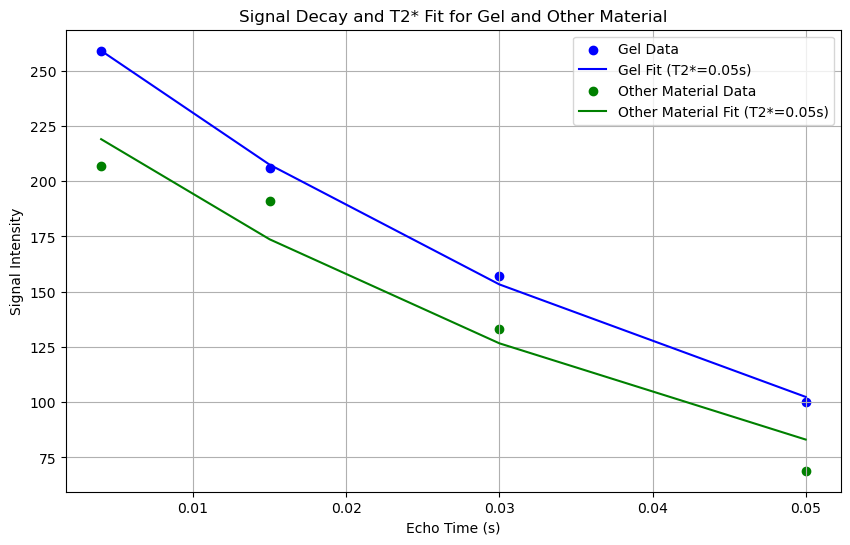

In [25]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define the T2* decay model: S(TE) = S0 * exp(-TE / T2*)
def t2_decay(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Predefined function to fit T2* curve
def fitT2Curve(te, signal):
    # Curve fitting to find S0 and T2*
    params, _ = curve_fit(t2_decay, te, signal, bounds=([0, 0], [np.inf, np.inf]))
    S0, T2_star = params  # Extract S0 and T2*
    return T2_star, S0

# Choose a voxel for gel and another material
gel_voxel = (120, 250)  # Adjust to a known gel region (x,y)                                       <-------
other_voxel = (118, 275)  # Adjust to a known other material region (x,y)                           <-------

# Extract signal for the chosen voxel for each echo time
signal_gel = np.array([slice_TE4ms[gel_voxel], slice_TE15ms[gel_voxel], slice_TE30ms[gel_voxel], slice_TE50ms[gel_voxel]])
signal_other = np.array([slice_TE4ms[other_voxel], slice_TE15ms[other_voxel], slice_TE30ms[other_voxel], slice_TE50ms[other_voxel]])

# Define the echo times (TE) in seconds (e.g., 0.004s, 0.015s, 0.030s, 0.050s)
TE_values = np.array([0.004, 0.015, 0.030, 0.050])

# Fit the T2* curve for the gel
T2_star_gel, S0_gel = fitT2Curve(TE_values, signal_gel)

# Fit the T2* curve for the other material
T2_star_other, S0_other = fitT2Curve(TE_values, signal_other)

# Print the results
print(f"Gel - S0: {S0_gel}, T2*: {T2_star_gel}")
print(f"Other Material - S0: {S0_other}, T2*: {T2_star_other}")

# Plot the signal and fitted curve for the gel and other material
plt.figure(figsize=(10, 6))
plt.scatter(TE_values, signal_gel, label='Gel Data', color='blue')
plt.plot(TE_values, t2_decay(TE_values, S0_gel, T2_star_gel), label=f'Gel Fit (T2*={T2_star_gel:.2f}s)', color='blue')
plt.scatter(TE_values, signal_other, label='Other Material Data', color='green')
plt.plot(TE_values, t2_decay(TE_values, S0_other, T2_star_other), label=f'Other Material Fit (T2*={T2_star_other:.2f}s)', color='green')
plt.xlabel('Echo Time (s)')
plt.ylabel('Signal Intensity')
plt.title('Signal Decay and T2* Fit for Gel and Other Material')
plt.legend()
plt.grid(True)
plt.show()

Image shape after cropping and rotation: (80, 170)
Gel - S0: 461.87, T2*: 0.0344 s
Material 1 - S0: 32.41, T2*: 0.1004 s
Material 2 - S0: 541.25, T2*: 0.1110 s
Material 3 - S0: 463.36, T2*: 0.1785 s


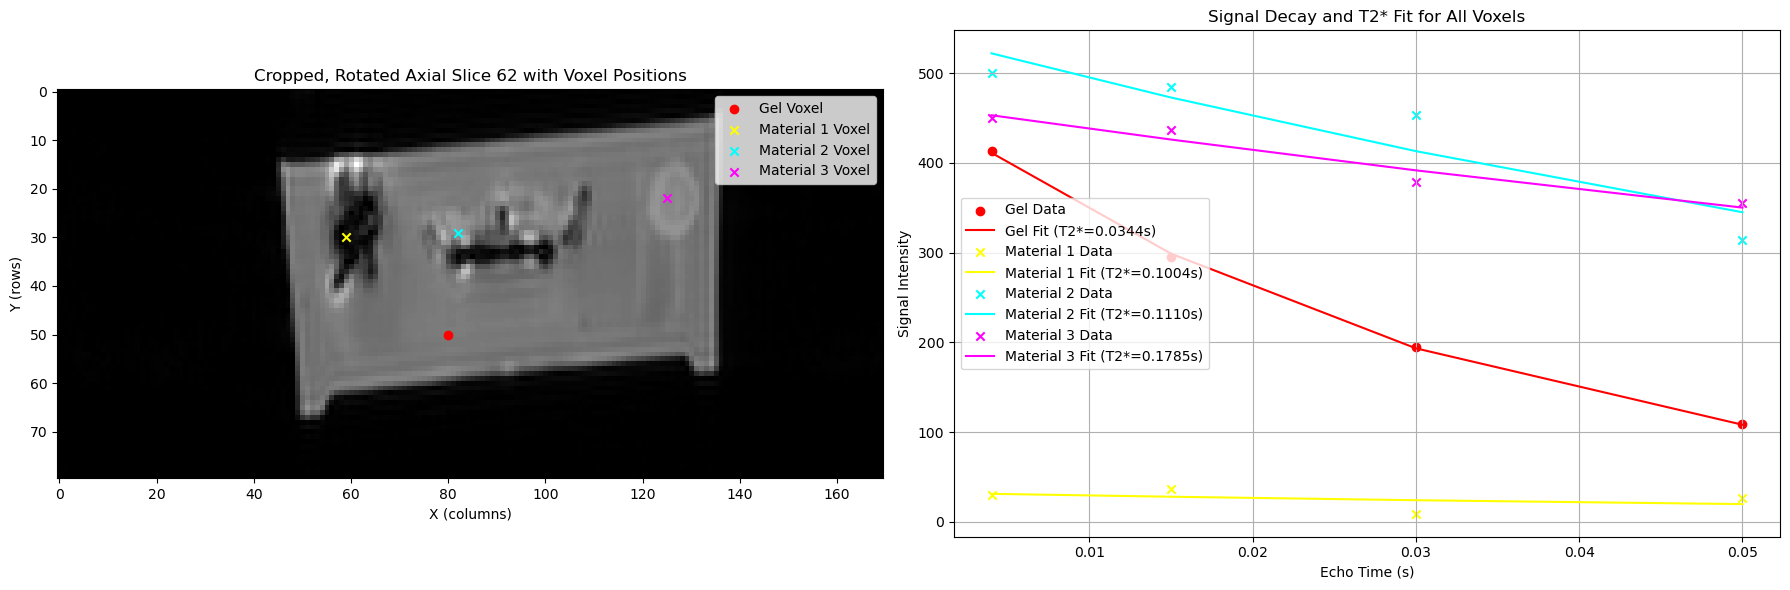

In [26]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json

# ============================
# Step 1: Define the T2* Decay Model and Fitting Function
# ============================

# Define the T2* decay model: S(TE) = S0 * exp(-TE / T2*)
def t2_decay(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Function to fit T2* curve with bounds to ensure positive parameters
def fitT2Curve(te, signal):
    try:
        # Provide initial guesses
        initial_guess = [np.max(signal), 0.05]  # Adjust initial T2* guess as needed
        # Fit the curve with bounds to ensure S0 > 0 and T2* > 0
        params, _ = curve_fit(t2_decay, te, signal, p0=initial_guess, bounds=([0, 0], [np.inf, np.inf]))
        S0, T2_star = params  # Extract S0 and T2*
        return T2_star, S0
    except (RuntimeError, ValueError):
        return np.nan, np.nan  # Return NaN if fitting fails

# ============================
# Step 2: Load, Crop, Rotate, and Flip the Data
# ============================

# Path to the data
path = 'MR_phantom_data/'

# Function to load JSON metadata
def load_json_metadata(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    TE = data.get('EchoTime', 'Unknown')  # Echo Time in seconds
    TR = data.get('RepetitionTime', 'Unknown')  # Repetition Time in seconds
    return TE, TR

# Define cropping indices (from your code)
x_min = 30   # Minimum x-index
x_max = 200  # Maximum x-index
y_min = 140  # Minimum y-index
y_max = 220  # Maximum y-index
z_min = 380  # Minimum z-index
z_max = 490  # Maximum z-index

# Define echo times (TE) in seconds
TE_values = np.array([0.004, 0.015, 0.030, 0.050])

# Dictionary to store data and metadata for each TE
echo_times = {
    'TE=4ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.json',
    },
    'TE=15ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.json',
    },
    'TE=30ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.json',
    },
    'TE=50ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.json',
    }
}

# Load and process data for each echo time
for te_key, te_info in echo_times.items():
    # Load data
    te_info['data'] = nib.load(path + te_info['nii_file']).get_fdata()
    # Load metadata
    te_info['TE'], te_info['TR'] = load_json_metadata(path + te_info['json_file'])
    # Crop the data
    te_info['cropped'] = te_info['data'][x_min:x_max, y_min:y_max, z_min:z_max]

# ============================
# Step 3: Rotate and Flip the Slices
# ============================

# Number of slices in the cropped data
axial_num_slices = echo_times['TE=4ms']['cropped'].shape[2]

# Preprocess the rotated and flipped slices for each echo time
for te_key, te_info in echo_times.items():
    te_info['axial_slices'] = [np.flip(np.rot90(te_info['cropped'][:, :, i]), axis=1) for i in range(axial_num_slices)]
    # Extract the axial slice 62
    axial_slice_idx = 62  # Adjust if necessary
    te_info['axial_slice_62'] = te_info['axial_slices'][axial_slice_idx]

# ============================
# Step 4: Extract the Slices for Each Echo Time
# ============================

# Extract the axial slices for each echo time
slice_TE4ms = echo_times['TE=4ms']['axial_slice_62']
slice_TE15ms = echo_times['TE=15ms']['axial_slice_62']
slice_TE30ms = echo_times['TE=30ms']['axial_slice_62']
slice_TE50ms = echo_times['TE=50ms']['axial_slice_62']

# ============================
# Step 5: Adjust Voxel Coordinates
# ============================

# The dimensions of the cropped, rotated, and flipped images
image_shape = slice_TE4ms.shape  # Should be (Y, X)
print(f"Image shape after cropping and rotation: {image_shape}")

# Adjust the voxel coordinates to match the cropped and rotated image
# Ensure that the voxel coordinates are within the dimensions of the image

# Choose voxels for gel and three other materials (adjusted coordinates)
gel_voxel = (50, 80)       # Coordinates (Y, X) for gel voxel (adjust as needed)
material_voxel_1 = (30, 59)  # Coordinates for material 1
material_voxel_2 = (29, 82)  # Coordinates for material 2
material_voxel_3 = (22, 125)  # Coordinates for material 3

# You may need to adjust these coordinates based on the new image dimensions
# Optionally, plot the image and click to select voxel positions
# For now, we'll proceed with these coordinates

# ============================
# Step 6: Extract Signal for the Chosen Voxels
# ============================

# Extract signal for the chosen voxels for each echo time
signal_gel = np.array([
    slice_TE4ms[gel_voxel],
    slice_TE15ms[gel_voxel],
    slice_TE30ms[gel_voxel],
    slice_TE50ms[gel_voxel]
])

signal_material_1 = np.array([
    slice_TE4ms[material_voxel_1],
    slice_TE15ms[material_voxel_1],
    slice_TE30ms[material_voxel_1],
    slice_TE50ms[material_voxel_1]
])

signal_material_2 = np.array([
    slice_TE4ms[material_voxel_2],
    slice_TE15ms[material_voxel_2],
    slice_TE30ms[material_voxel_2],
    slice_TE50ms[material_voxel_2]
])

signal_material_3 = np.array([
    slice_TE4ms[material_voxel_3],
    slice_TE15ms[material_voxel_3],
    slice_TE30ms[material_voxel_3],
    slice_TE50ms[material_voxel_3]
])

# ============================
# Step 7: Fit the T2* Curve for Each Voxel
# ============================

# Fit the T2* curve for each voxel
T2_star_gel, S0_gel = fitT2Curve(TE_values, signal_gel)
T2_star_mat1, S0_mat1 = fitT2Curve(TE_values, signal_material_1)
T2_star_mat2, S0_mat2 = fitT2Curve(TE_values, signal_material_2)
T2_star_mat3, S0_mat3 = fitT2Curve(TE_values, signal_material_3)

# Print the results
print(f"Gel - S0: {S0_gel:.2f}, T2*: {T2_star_gel:.4f} s")
print(f"Material 1 - S0: {S0_mat1:.2f}, T2*: {T2_star_mat1:.4f} s")
print(f"Material 2 - S0: {S0_mat2:.2f}, T2*: {T2_star_mat2:.4f} s")
print(f"Material 3 - S0: {S0_mat3:.2f}, T2*: {T2_star_mat3:.4f} s")

# ============================
# Step 8: Plot the Slice and Mark Voxel Positions
# ============================

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot the slice and mark the voxel positions
ax[0].imshow(slice_TE4ms, cmap='gray')
ax[0].scatter(gel_voxel[1], gel_voxel[0], color='red', marker='o', label='Gel Voxel')
ax[0].scatter(material_voxel_1[1], material_voxel_1[0], color='yellow', marker='x', label='Material 1 Voxel')
ax[0].scatter(material_voxel_2[1], material_voxel_2[0], color='cyan', marker='x', label='Material 2 Voxel')
ax[0].scatter(material_voxel_3[1], material_voxel_3[0], color='magenta', marker='x', label='Material 3 Voxel')
ax[0].legend(loc='upper right')
ax[0].set_title('Cropped, Rotated Axial Slice 62 with Voxel Positions')
ax[0].set_xlabel('X (columns)')
ax[0].set_ylabel('Y (rows)')

# ============================
# Step 9: Plot the Signal Decay Curves
# ============================

# Plot the signal decay curves
ax[1].scatter(TE_values, signal_gel, label='Gel Data', color='red', marker='o')
ax[1].plot(TE_values, t2_decay(TE_values, S0_gel, T2_star_gel), label=f'Gel Fit (T2*={T2_star_gel:.4f}s)', color='red')

ax[1].scatter(TE_values, signal_material_1, label='Material 1 Data', color='yellow', marker='x')
ax[1].plot(TE_values, t2_decay(TE_values, S0_mat1, T2_star_mat1), label=f'Material 1 Fit (T2*={T2_star_mat1:.4f}s)', color='yellow')

ax[1].scatter(TE_values, signal_material_2, label='Material 2 Data', color='cyan', marker='x')
ax[1].plot(TE_values, t2_decay(TE_values, S0_mat2, T2_star_mat2), label=f'Material 2 Fit (T2*={T2_star_mat2:.4f}s)', color='cyan')

ax[1].scatter(TE_values, signal_material_3, label='Material 3 Data', color='magenta', marker='x')
ax[1].plot(TE_values, t2_decay(TE_values, S0_mat3, T2_star_mat3), label=f'Material 3 Fit (T2*={T2_star_mat3:.4f}s)', color='magenta')

ax[1].set_xlabel('Echo Time (s)')
ax[1].set_ylabel('Signal Intensity')
ax[1].set_title('Signal Decay and T2* Fit for All Voxels')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


### TASK 10

 - In the current implementation, the x-axis of the plots represents the voxel positions along the chosen line across the phantom. Specifically:
    - X-axis (Voxel Position): This represents the individual pixel/voxel positions along a horizontal line (defined by line_idx = 118) across the chosen axial slice (axial_slice = 50).
    - In other words, for each voxel (or pixel) along this line, you're computing the T2* and S0 values based on the signal intensities across different echo times (TE values).
    - The loop is essentially "sliding" across these voxel positions, fitting the decay curve at each one to obtain T2* and S0 values. So, for every voxel on the x-axis, you're getting a T2* and S0 estimate.

/var/folders/dq/gc75zws15616_kp0fgwfkspr0000gn/T/ipykernel_34925/594071067.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(t2_decay, te, signal)


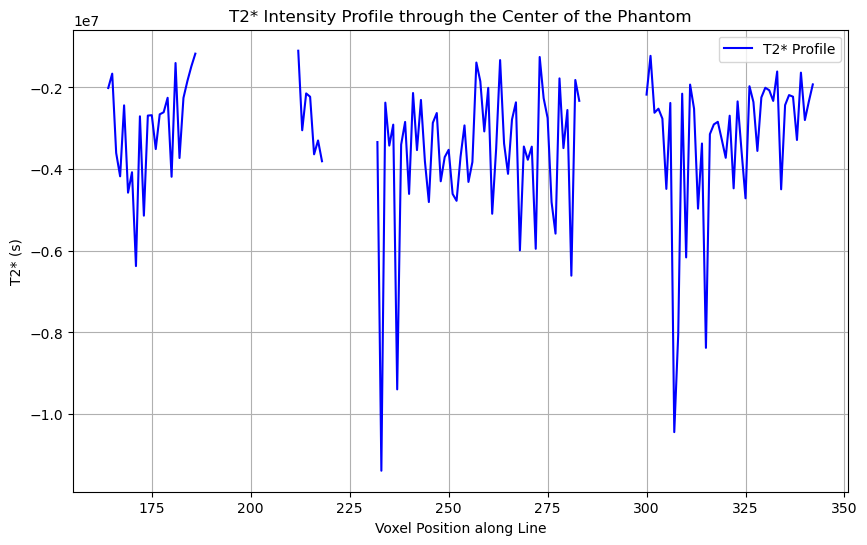

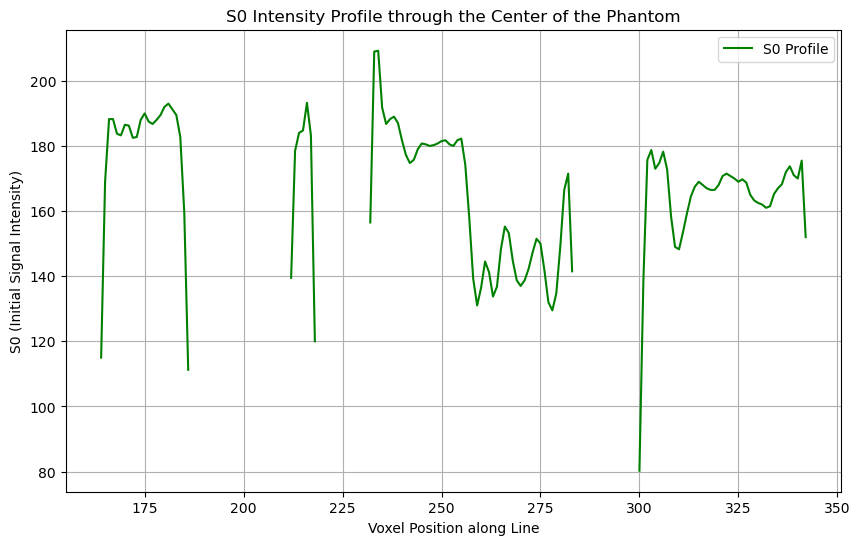

In [27]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the T2* decay model: S(TE) = S0 * exp(-TE / T2*)
def t2_decay(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Function to fit T2* curve and handle low SNR cases
def fitT2Curve(te, signal, snr_threshold=100):  # Increased SNR threshold
    if np.count_nonzero(signal > snr_threshold) < 2:  # Need at least 2 points with high SNR
        return np.nan, np.nan  # Return NaN for S0 and T2* if signal is too low
    try:
        params, _ = curve_fit(t2_decay, te, signal)
        S0, T2_star = params
        return S0, T2_star
    except RuntimeError:
        return np.nan, np.nan  # Return NaN if fitting fails

# Load your phantom data (assuming the data has been loaded as file_TE4ms, etc.)
path = 'MR_phantom_data/'
file_TE4ms = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE15ms = nib.load(path + 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE30ms = nib.load(path + 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE50ms = nib.load(path + 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz').get_fdata()

# Define echo times (in seconds)
TE_values = np.array([0.004, 0.015, 0.030, 0.050])

# Select the center line along one axis (e.g., axial slice 50, central row)
axial_slice = 50  # Adjust as needed for your data
line_idx = 118  # Adjust based on your data selection

# Prepare arrays to store T2* and S0 values along the line
t2_star_profile = np.full(file_TE4ms.shape[1], np.nan)  # NaN by default
s0_profile = np.full(file_TE4ms.shape[1], np.nan)

# Loop over each voxel along the chosen line
for i in range(file_TE4ms.shape[1]):
    signal = np.array([file_TE4ms[line_idx, i, axial_slice], 
                       file_TE15ms[line_idx, i, axial_slice], 
                       file_TE30ms[line_idx, i, axial_slice], 
                       file_TE50ms[line_idx, i, axial_slice]])
    
    # Fit T2* curve with improved SNR handling
    S0, T2_star = fitT2Curve(TE_values, signal, snr_threshold=100)
    t2_star_profile[i] = T2_star
    s0_profile[i] = S0

# Plot the T2* profile along the chosen line
plt.figure(figsize=(10, 6))
plt.plot(t2_star_profile, label='T2* Profile', color='blue')
plt.xlabel('Voxel Position along Line')
plt.ylabel('T2* (s)')
plt.title('T2* Intensity Profile through the Center of the Phantom')
plt.grid(True)
plt.legend()
plt.show()

# Plot the S0 profile along the chosen line (optional)
plt.figure(figsize=(10, 6))
plt.plot(s0_profile, label='S0 Profile', color='green')
plt.xlabel('Voxel Position along Line')
plt.ylabel('S0 (Initial Signal Intensity)')
plt.title('S0 Intensity Profile through the Center of the Phantom')
plt.grid(True)
plt.legend()
plt.show()

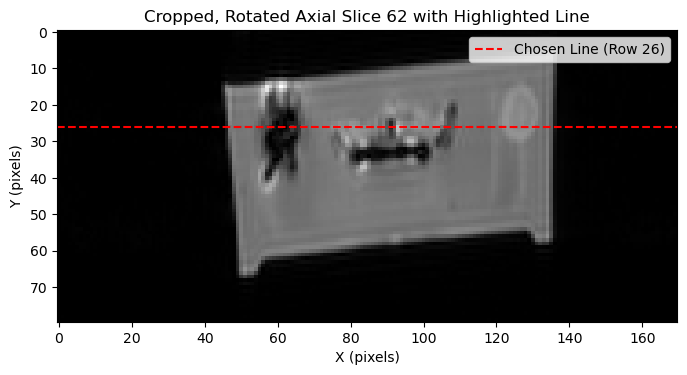

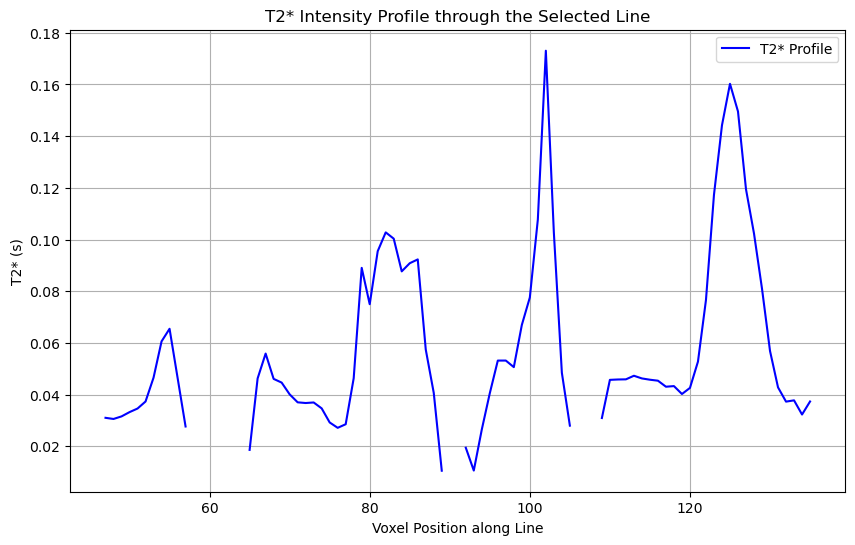

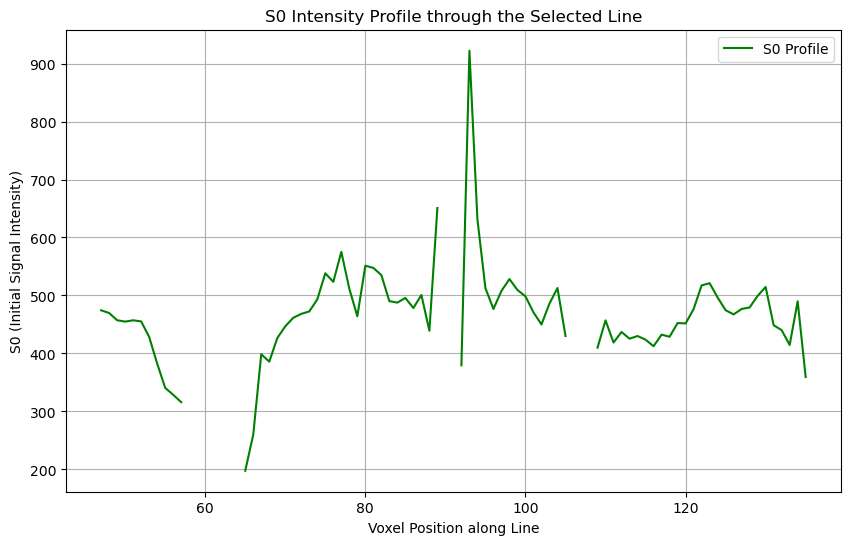

In [28]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ============================
# Step 1: Define the T2* Decay Model and Fitting Function
# ============================

# Define the T2* decay model: S(TE) = S0 * exp(-TE / T2*)
def t2_decay(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Function to fit T2* curve with bounds to ensure positive parameters
def fitT2Curve(te, signal, snr_threshold=100):
    if np.count_nonzero(signal > snr_threshold) < 2:  # Ensure at least 2 points with high SNR
        return np.nan, np.nan
    try:
        # Provide initial guesses and bounds for fit
        initial_guess = [np.max(signal), 0.05]  # Adjust initial T2* guess if needed
        params, _ = curve_fit(t2_decay, te, signal, p0=initial_guess, bounds=([0, 0], [np.inf, np.inf]))
        S0, T2_star = params
        return S0, T2_star
    except (RuntimeError, ValueError):
        return np.nan, np.nan

# ============================
# Step 2: Load, Crop, Rotate, and Flip Phantom Data
# ============================

# Path to the data
path = 'MR_phantom_data/'
file_TE4ms = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE15ms = nib.load(path + 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE30ms = nib.load(path + 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE50ms = nib.load(path + 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz').get_fdata()

# Define echo times (in seconds)
TE_values = np.array([0.004, 0.015, 0.030, 0.050])

# Assume that cropping indices are predefined
x_min, x_max = 30, 200
y_min, y_max = 140, 220
z_min, z_max = 380, 490

# Crop and rotate the slices
cropped_TE4ms = np.flip(np.rot90(file_TE4ms[x_min:x_max, y_min:y_max, z_min:z_max], k=1), axis=1)
cropped_TE15ms = np.flip(np.rot90(file_TE15ms[x_min:x_max, y_min:y_max, z_min:z_max], k=1), axis=1)
cropped_TE30ms = np.flip(np.rot90(file_TE30ms[x_min:x_max, y_min:y_max, z_min:z_max], k=1), axis=1)
cropped_TE50ms = np.flip(np.rot90(file_TE50ms[x_min:x_max, y_min:y_max, z_min:z_max], k=1), axis=1)

# ============================
# Step 3: Select Axial Slice 62 and Line Index for Analysis
# ============================

# Select the axial slice and line along the row to examine
axial_slice_idx = 62  # The cropped, rotated axial slice 62
line_idx = 26  # Adjust based on the materials of interest in the phantom

# Plot the chosen axial slice and highlight the selected line
plt.figure(figsize=(8, 6))
plt.imshow(cropped_TE4ms[:, :, axial_slice_idx], cmap='gray')
plt.axhline(y=line_idx, color='red', linestyle='--', label=f'Chosen Line (Row {line_idx})')
plt.title(f'Cropped, Rotated Axial Slice {axial_slice_idx} with Highlighted Line')
plt.xlabel('X (pixels)')
plt.ylabel('Y (pixels)')
plt.legend()
plt.show()

# Prepare arrays to store T2* and S0 values along the line
num_voxels = cropped_TE4ms.shape[1]  # Number of voxels along X-axis in the line
t2_star_profile = np.full(num_voxels, np.nan)  # NaN by default
s0_profile = np.full(num_voxels, np.nan)

# Loop over each voxel in the line
for x in range(num_voxels):
    signal = np.array([
        cropped_TE4ms[line_idx, x, axial_slice_idx],
        cropped_TE15ms[line_idx, x, axial_slice_idx],
        cropped_TE30ms[line_idx, x, axial_slice_idx],
        cropped_TE50ms[line_idx, x, axial_slice_idx]
    ])
    
    # Fit T2* curve with improved SNR handling
    S0, T2_star = fitT2Curve(TE_values, signal, snr_threshold=100)
    t2_star_profile[x] = T2_star
    s0_profile[x] = S0

# ============================
# Step 4: Plot the T2* and S0 Profiles along the Selected Line
# ============================

# Plot the T2* profile along the chosen line
plt.figure(figsize=(10, 6))
plt.plot(t2_star_profile, label='T2* Profile', color='blue')
plt.xlabel('Voxel Position along Line')
plt.ylabel('T2* (s)')
plt.title('T2* Intensity Profile through the Selected Line')
plt.grid(True)
plt.legend()
plt.show()

# Plot the S0 profile along the chosen line
plt.figure(figsize=(10, 6))
plt.plot(s0_profile, label='S0 Profile', color='green')
plt.xlabel('Voxel Position along Line')
plt.ylabel('S0 (Initial Signal Intensity)')
plt.title('S0 Intensity Profile through the Selected Line')
plt.grid(True)
plt.legend()
plt.show()


### TASK 11

 - Explanation:
    - This code computes T2* and S0 values for every voxel in the chosen axial slice (axial_slice = 50).
    - It generates a T2* map and an S0 map, which can give you a 2D visualization of how T2* values and initial signal intensities vary across the slice.
    - T2* values are displayed using a color map (e.g., jet), while S0 is plotted in grayscale.


Output:
 1. T2* Map: A heatmap-like display showing the T2* values for each voxel in the slice.
 2. S0 Map: A grayscale map showing the initial signal intensities.

/var/folders/dq/gc75zws15616_kp0fgwfkspr0000gn/T/ipykernel_34925/488569989.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(t2_decay, te, signal)


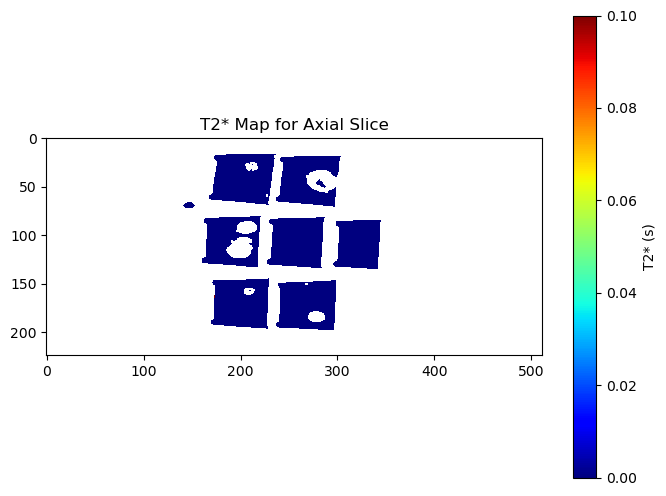

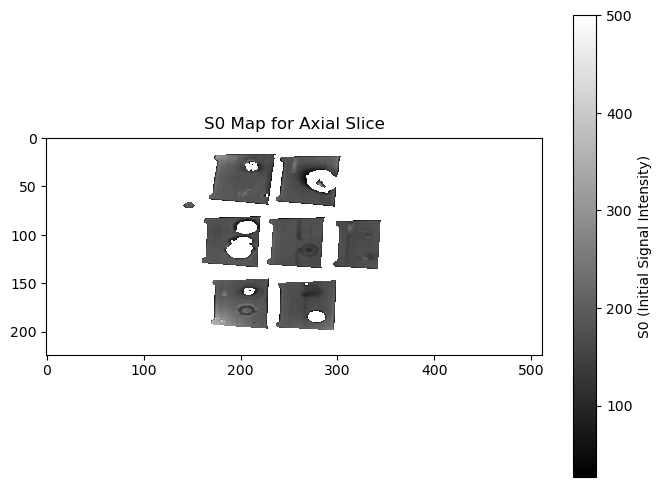

In [29]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the T2* decay model: S(TE) = S0 * exp(-TE / T2*)
def t2_decay(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Function to fit T2* curve
def fitT2Curve(te, signal, snr_threshold=50):
    if np.count_nonzero(signal > snr_threshold) < 2:  # Need at least 2 points with high SNR
        return np.nan, np.nan  # Return NaN for S0 and T2* if signal is too low
    try:
        params, _ = curve_fit(t2_decay, te, signal)
        S0, T2_star = params
        return S0, T2_star
    except RuntimeError:
        return np.nan, np.nan  # Return NaN if fitting fails

# Load the data for different echo times
path = 'MR_phantom_data/'
file_TE4ms = nib.load(path + 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE15ms = nib.load(path + 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE30ms = nib.load(path + 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz').get_fdata()
file_TE50ms = nib.load(path + 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz').get_fdata()

# Define echo times (in seconds)
TE_values = np.array([0.004, 0.015, 0.030, 0.050])

# Select the axial slice to analyze (e.g., slice 50)
axial_slice = 50

# Prepare arrays to store the T2* and S0 values for each voxel in the slice
t2_star_map = np.full((file_TE4ms.shape[0], file_TE4ms.shape[1]), np.nan)
s0_map = np.full((file_TE4ms.shape[0], file_TE4ms.shape[1]), np.nan)

# Loop over each voxel in the chosen axial slice
for x in range(file_TE4ms.shape[0]):  # Loop over X-axis
    for y in range(file_TE4ms.shape[1]):  # Loop over Y-axis
        signal = np.array([file_TE4ms[x, y, axial_slice],
                           file_TE15ms[x, y, axial_slice],
                           file_TE30ms[x, y, axial_slice],
                           file_TE50ms[x, y, axial_slice]])
        
        S0, T2_star = fitT2Curve(TE_values, signal)
        t2_star_map[x, y] = T2_star
        s0_map[x, y] = S0

# Plot the T2* map for the entire axial slice
plt.figure(figsize=(8, 6))
plt.imshow(t2_star_map, cmap='jet', vmin=0, vmax=0.1)  # Adjust color range as necessary
plt.colorbar(label='T2* (s)')
plt.title('T2* Map for Axial Slice')
plt.show()

# Plot the S0 map for the entire axial slice
plt.figure(figsize=(8, 6))
plt.imshow(s0_map, cmap='gray')
plt.colorbar(label='S0 (Initial Signal Intensity)')
plt.title('S0 Map for Axial Slice')
plt.show()

for the rotated cropped axial slice 62

Axial slice dimensions: 80x170, Number of TEs: 4


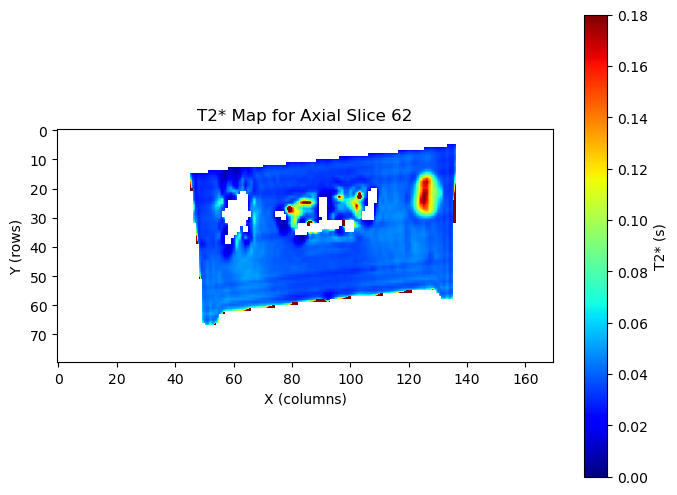

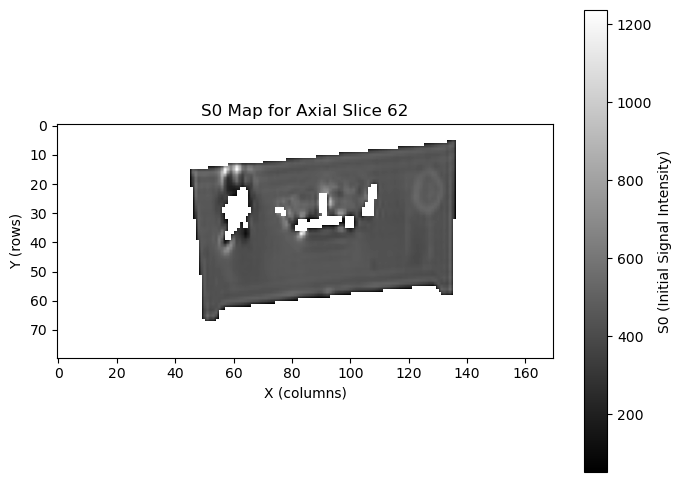

In [30]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json

# ============================
# Step 1: Define the T2* Decay Model and Fitting Function
# ============================

# Define the T2* decay model: S(TE) = S0 * exp(-TE / T2*)
def t2_decay(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Function to fit T2* curve with bounds to ensure positive parameters
def fitT2Curve(te, signal):
    # Only fit if at least two signal values are above a threshold
    snr_threshold = 50  # Adjust as needed
    if np.count_nonzero(signal > snr_threshold) < 2:
        return np.nan, np.nan
    try:
        # Provide initial guesses
        initial_guess = [np.max(signal), 0.05]  # Adjust initial T2* guess as needed
        # Fit the curve with bounds to ensure S0 > 0 and T2* > 0
        params, _ = curve_fit(
            t2_decay, te, signal, p0=initial_guess, bounds=([0, 0], [np.inf, np.inf])
        )
        S0, T2_star = params  # Extract S0 and T2*
        return S0, T2_star
    except (RuntimeError, ValueError):
        return np.nan, np.nan  # Return NaN if fitting fails

# ============================
# Step 2: Load, Crop, Rotate, and Flip the Data
# ============================

# Path to the data
path = 'MR_phantom_data/'

# Function to load JSON metadata
def load_json_metadata(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    TE = data.get('EchoTime', 'Unknown')  # Echo Time in seconds
    TR = data.get('RepetitionTime', 'Unknown')  # Repetition Time in seconds
    return TE, TR

# Define cropping indices (from your code)
x_min = 30   # Minimum x-index
x_max = 200  # Maximum x-index
y_min = 140  # Minimum y-index
y_max = 220  # Maximum y-index
z_min = 380  # Minimum z-index
z_max = 490  # Maximum z-index

# Define echo times (TE) in seconds
TE_values = np.array([0.004, 0.015, 0.030, 0.050])

# Dictionary to store data and metadata for each TE
echo_times = {
    'TE=4ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.json',
    },
    'TE=15ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.json',
    },
    'TE=30ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.json',
    },
    'TE=50ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.json',
    }
}

# Load and process data for each echo time
for te_key, te_info in echo_times.items():
    # Load data
    te_info['data'] = nib.load(path + te_info['nii_file']).get_fdata()
    # Load metadata
    te_info['TE'], te_info['TR'] = load_json_metadata(path + te_info['json_file'])
    # Crop the data
    te_info['cropped'] = te_info['data'][x_min:x_max, y_min:y_max, z_min:z_max]

# ============================
# Step 3: Rotate and Flip the Slices
# ============================

# Number of slices in the cropped data
axial_num_slices = echo_times['TE=4ms']['cropped'].shape[2]

# Preprocess the rotated and flipped slices for each echo time
for te_key, te_info in echo_times.items():
    te_info['axial_slices'] = [
        np.flip(np.rot90(te_info['cropped'][:, :, i]), axis=1) for i in range(axial_num_slices)
    ]
    # Extract the axial slice 62
    axial_slice_idx = 62  # Adjust if necessary
    te_info['axial_slice_62'] = te_info['axial_slices'][axial_slice_idx]

# ============================
# Step 4: Extract the Axial Slice 62 for Each Echo Time
# ============================

# Extract the axial slices for each echo time
slice_TE4ms = echo_times['TE=4ms']['axial_slice_62']
slice_TE15ms = echo_times['TE=15ms']['axial_slice_62']
slice_TE30ms = echo_times['TE=30ms']['axial_slice_62']
slice_TE50ms = echo_times['TE=50ms']['axial_slice_62']

# Stack the slices to create a 3D array: (Y, X, TE)
slices_stack = np.stack(
    [slice_TE4ms, slice_TE15ms, slice_TE30ms, slice_TE50ms], axis=-1
)  # Shape: (Y, X, 4)

# Get the dimensions of the axial slice
height, width, num_TEs = slices_stack.shape
print(f"Axial slice dimensions: {height}x{width}, Number of TEs: {num_TEs}")

# ============================
# Step 5: Compute T2* and S0 Maps
# ============================

# Prepare arrays to store the T2* and S0 values for each voxel in the slice
t2_star_map = np.full((height, width), np.nan)
s0_map = np.full((height, width), np.nan)

# Loop over each voxel in the axial slice
for y in range(height):  # Loop over Y-axis (rows)
    for x in range(width):  # Loop over X-axis (columns)
        signal = slices_stack[y, x, :]
        
        # Fit T2* curve
        S0, T2_star = fitT2Curve(TE_values, signal)
        t2_star_map[y, x] = T2_star
        s0_map[y, x] = S0

# ============================
# Step 6: Plot the T2* and S0 Maps
# ============================

# Plot the T2* map for the axial slice 62
plt.figure(figsize=(8, 6))
plt.imshow(t2_star_map, cmap='jet', vmin=0, vmax=0.18) # 0.2 is based on previous plots, just before, where we can see max is around 0.18.
plt.colorbar(label='T2* (s)')
plt.title('T2* Map for Axial Slice 62')
plt.xlabel('X (columns)')
plt.ylabel('Y (rows)')
plt.show()

# Plot the S0 map for the axial slice 62
plt.figure(figsize=(8, 6))
plt.imshow(s0_map, cmap='gray')
plt.colorbar(label='S0 (Initial Signal Intensity)')
plt.title('S0 Map for Axial Slice 62')
plt.xlabel('X (columns)')
plt.ylabel('Y (rows)')
plt.show()


with Cartesian coordinate system

Axial slice dimensions: 80x170, Number of TEs: 4


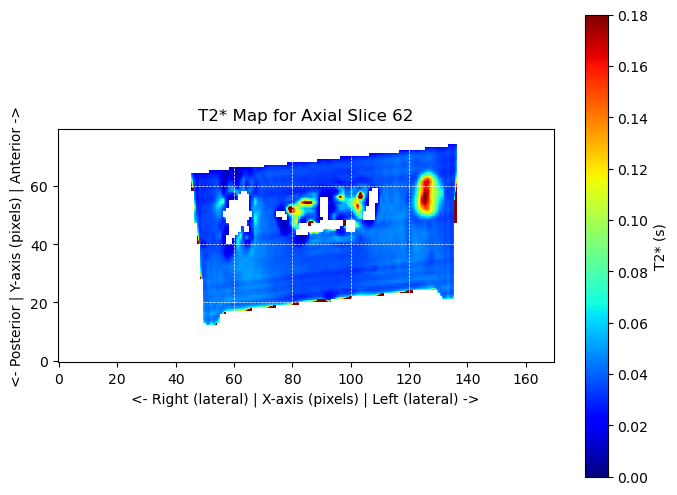

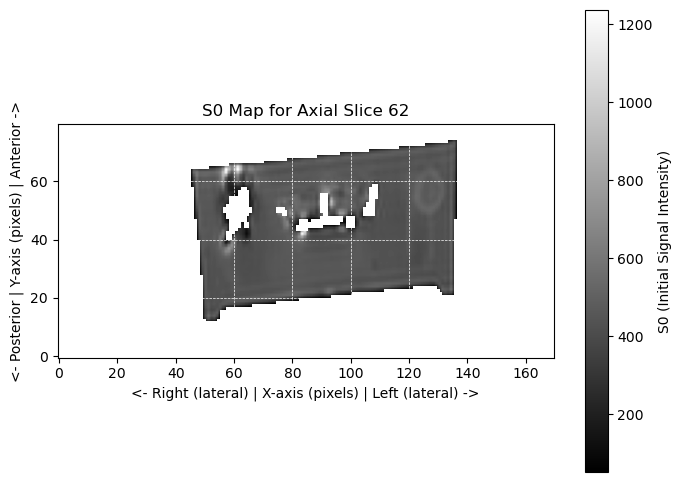

In [31]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json

# ============================
# Step 1: Define the T2* Decay Model and Fitting Function
# ============================

# Define the T2* decay model: S(TE) = S0 * exp(-TE / T2*)
def t2_decay(te, S0, T2_star):
    return S0 * np.exp(-te / T2_star)

# Function to fit T2* curve with bounds to ensure positive parameters
def fitT2Curve(te, signal):
    # Only fit if at least two signal values are above a threshold
    snr_threshold = 50  # Adjust as needed
    if np.count_nonzero(signal > snr_threshold) < 2:
        return np.nan, np.nan
    try:
        # Provide initial guesses
        initial_guess = [np.max(signal), 0.05]  # Adjust initial T2* guess as needed
        # Fit the curve with bounds to ensure S0 > 0 and T2* > 0
        params, _ = curve_fit(
            t2_decay, te, signal, p0=initial_guess, bounds=([0, 0], [np.inf, np.inf])
        )
        S0, T2_star = params  # Extract S0 and T2*
        return S0, T2_star
    except (RuntimeError, ValueError):
        return np.nan, np.nan  # Return NaN if fitting fails

# ============================
# Step 2: Load, Crop, Rotate, and Flip the Data
# ============================

# Path to the data
path = 'MR_phantom_data/'

# Function to load JSON metadata
def load_json_metadata(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    TE = data.get('EchoTime', 'Unknown')  # Echo Time in seconds
    TR = data.get('RepetitionTime', 'Unknown')  # Repetition Time in seconds
    return TE, TR

# Define cropping indices (from your code)
x_min = 30   # Minimum x-index
x_max = 200  # Maximum x-index
y_min = 140  # Minimum y-index
y_max = 220  # Maximum y-index
z_min = 380  # Minimum z-index
z_max = 490  # Maximum z-index

# Define echo times (TE) in seconds
TE_values = np.array([0.004, 0.015, 0.030, 0.050])

# Dictionary to store data and metadata for each TE
echo_times = {
    'TE=4ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE4ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None
    },
    'TE=15ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE15ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None
    },
    'TE=30ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE30ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None
    },
    'TE=50ms': {
        'nii_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.nii.gz',
        'json_file': 'A_DTU22481_20240910093808_TE50ms_TR100ms_FA20.json',
        'data': None,
        'TE': None,
        'TR': None,
        'cropped': None,
        'sagittal': None,
        'coronal': None,
        'axial': None
    }
}

# Load and process data for each echo time
for te_key, te_info in echo_times.items():
    # Load data
    te_info['data'] = nib.load(path + te_info['nii_file']).get_fdata()
    # Load metadata
    te_info['TE'], te_info['TR'] = load_json_metadata(path + te_info['json_file'])
    # Crop the data
    te_info['cropped'] = te_info['data'][x_min:x_max, y_min:y_max, z_min:z_max]

# ============================
# Step 3: Rotate and Flip the Slices
# ============================

# Number of slices in the cropped data
axial_num_slices = echo_times['TE=4ms']['cropped'].shape[2]

# Preprocess the rotated and flipped slices for each echo time
for te_key, te_info in echo_times.items():
    te_info['axial_slices'] = [
        np.flip(np.rot90(te_info['cropped'][:, :, i]), axis=1) for i in range(axial_num_slices)
    ]
    # Extract the axial slice 62
    axial_slice_idx = 62  # Adjust if necessary
    te_info['axial_slice_62'] = te_info['axial_slices'][axial_slice_idx]

# ============================
# Step 4: Extract the Axial Slice 62 for Each Echo Time
# ============================

# Extract the axial slices for each echo time
slice_TE4ms = echo_times['TE=4ms']['axial_slice_62']
slice_TE15ms = echo_times['TE=15ms']['axial_slice_62']
slice_TE30ms = echo_times['TE=30ms']['axial_slice_62']
slice_TE50ms = echo_times['TE=50ms']['axial_slice_62']

# Stack the slices to create a 3D array: (Y, X, TE)
slices_stack = np.stack(
    [slice_TE4ms, slice_TE15ms, slice_TE30ms, slice_TE50ms], axis=-1
)  # Shape: (Y, X, 4)

# Get the dimensions of the axial slice
height, width, num_TEs = slices_stack.shape
print(f"Axial slice dimensions: {height}x{width}, Number of TEs: {num_TEs}")

# ============================
# Step 5: Compute T2* and S0 Maps
# ============================

# Prepare arrays to store the T2* and S0 values for each voxel in the slice
t2_star_map = np.full((height, width), np.nan)
s0_map = np.full((height, width), np.nan)

# Loop over each voxel in the axial slice
for y in range(height):  # Loop over Y-axis (rows)
    for x in range(width):  # Loop over X-axis (columns)
        signal = slices_stack[y, x, :]
        
        # Fit T2* curve
        S0, T2_star = fitT2Curve(TE_values, signal)
        t2_star_map[y, x] = T2_star
        s0_map[y, x] = S0

# ============================
# Step 6: Plot the T2* and S0 Maps with Cartesian Coordinates and Scale Bars
# ============================

# Define a function to add scale bars
def add_scale_bar(ax, length_cm, axis='x', pixel_per_mm=1.0, color='red', padding=10):
    """
    Add a scale bar to a matplotlib Axes.

    Parameters:
    - ax: Matplotlib Axes object
    - length_cm: Length of the scale bar in centimeters
    - axis: 'x' or 'y', which axis the scale bar is aligned with
    - pixel_per_mm: Number of pixels per millimeter along the specified axis
    - color: Color of the scale bar
    - padding: Padding in pixels from the edge of the plot
    """
    length_mm = length_cm * 10  # Convert cm to mm
    length_px = length_mm * pixel_per_mm  # Calculate the number of pixels

    if axis == 'x':
        x_start = padding
        y_start = height - padding
        x_end = x_start + length_px
        y_end = y_start
    elif axis == 'y':
        x_start = padding
        y_start = height - padding
        x_end = x_start
        y_end = y_start - length_px
    else:
        raise ValueError("Axis must be 'x' or 'y'")

    ax.plot([x_start, x_end], [y_start, y_end], color=color, linewidth=2)
    ax.text(
        (x_start + x_end) / 2,
        y_start - 5 if axis == 'x' else (y_start + y_end) / 2,
        f'{length_cm} cm',
        color=color,
        ha='center',
        va='top' if axis == 'x' else 'center'
    )

# Define pixel dimensions (mm per pixel)
# From your earlier code, pixdim[1] = x, pixdim[2] = y, pixdim[3] = z
# Assuming 1.3 mm/pixel on x-axis and 0.7422 mm/pixel on y-axis
pixdim_x = 1.3  # mm/pixel
pixdim_y = 0.7422  # mm/pixel

# Plot the T2* map for the axial slice 62
plt.figure(figsize=(8, 6))
ax1 = plt.gca()
im1 = ax1.imshow(np.flip(t2_star_map, axis=0), cmap='jet', vmin=0, vmax=0.18, origin='lower', aspect='equal')
plt.colorbar(im1, ax=ax1, label='T2* (s)')
plt.title('T2* Map for Axial Slice 62')
plt.xlabel('<- Right (lateral) | X-axis (pixels) | Left (lateral) ->')
plt.ylabel('<- Posterior | Y-axis (pixels) | Anterior ->')

# Add scale bars
add_scale_bar(ax=ax1, length_cm=3, axis='x', pixel_per_mm=pixdim_x, color='white', padding=10)
add_scale_bar(ax=ax1, length_cm=3, axis='y', pixel_per_mm=pixdim_y, color='white', padding=10)

# Add grid with appropriate ticks
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, width, 20))
plt.yticks(np.arange(0, height, 20))
plt.show()

# Plot the S0 map for the axial slice 62
plt.figure(figsize=(8, 6))
ax2 = plt.gca()
im2 = ax2.imshow(np.flip(s0_map, axis=0), cmap='gray', origin='lower', aspect='equal')
plt.colorbar(im2, ax=ax2, label='S0 (Initial Signal Intensity)')
plt.title('S0 Map for Axial Slice 62')
plt.xlabel('<- Right (lateral) | X-axis (pixels) | Left (lateral) ->')
plt.ylabel('<- Posterior | Y-axis (pixels) | Anterior ->')

# Add scale bars
add_scale_bar(ax=ax2, length_cm=3, axis='x', pixel_per_mm=pixdim_x, color='white', padding=10)
add_scale_bar(ax=ax2, length_cm=3, axis='y', pixel_per_mm=pixdim_y, color='white', padding=10)

# Add grid with appropriate ticks
plt.grid(color='white', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, width, 20))
plt.yticks(np.arange(0, height, 20))
plt.show()


# Ekstra

### Length of Material 3

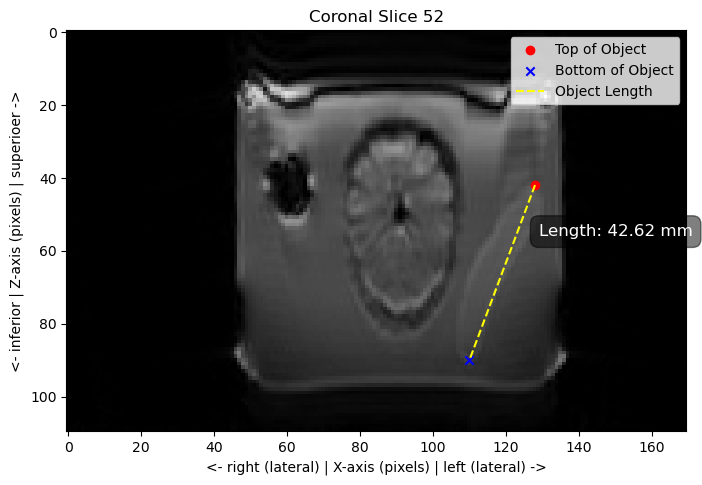

Distance between points: 42.62 mm


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# ============================
# TASK: Plot Coronal Slice 52 with Two Points and Calculate Length
# ============================

# Assume that 'v1_coronal_all_slices' is already defined from your previous code
# If not, make sure to run the relevant part of your code first

# Define coronal slice index
coronal_slice_idx = 52

# Get the desired coronal slice
coronal_slice = v1_coronal_all_slices[coronal_slice_idx]

# Plot the coronal slice
plt.figure(figsize=(8, 8))
plt.imshow(np.rot90(coronal_slice, k=1), cmap='gray')
plt.title(f'Coronal Slice {coronal_slice_idx}')
plt.xlabel('<- right (lateral) | X-axis (pixels) | left (lateral) ->')
plt.ylabel('<- inferior | Z-axis (pixels) | superioer ->')

# ============================
# Define two points on the object
# ============================

# Manual selection of points (replace these with your own coordinates)
point1 = (128, 42)  # Replace with your own coordinates (x1, z1)
point2 = (110, 90)  # Replace with your own coordinates (x2, z2)

# Plot the points
plt.scatter(point1[0], point1[1], color='red', marker='o', label='Top of Object')
plt.scatter(point2[0], point2[1], color='blue', marker='x', label='Bottom of Object')

# Draw a line between the two points
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='yellow', linestyle='--', label='Object Length')

# ============================
# Calculate the physical length
# ============================

# Pixel sizes in mm
pixel_size_x = 1.3    # mm per pixel on x-axis
pixel_size_z = 0.7422 # mm per pixel on z-axis

# Extract coordinates
x1, z1 = point1
x2, z2 = point2

# Calculate pixel differences
delta_x = x2 - x1
delta_z = z2 - z1

# Calculate the physical distance
distance_mm = np.sqrt( (delta_x * pixel_size_x)**2 + (delta_z * pixel_size_z)**2 )

# ============================
# Annotate the plot with length
# ============================

# Determine the midpoint for placing the annotation
mid_x = (x1 + x2) / 2
mid_z = (z1 + z2) / 2

# Offset for the text to prevent overlapping with the line
offset_x = 10
offset_z = -10

# Create annotation string
length_text = f'Length: {distance_mm:.2f} mm'

# Add text annotation to the plot
plt.text(mid_x + offset_x, mid_z + offset_z, length_text, color='white', fontsize=12,
         bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))

plt.legend()

# Show the plot with annotation
plt.show()

# Print the results in the console
print(f"Distance between points: {distance_mm:.2f} mm")


With Cartesian coordinate system

Applied horizontal flip to the coronal slice.
Original Points: (128, 68), (110, 20)
Flipped Points: (128, 68), (110, 20)


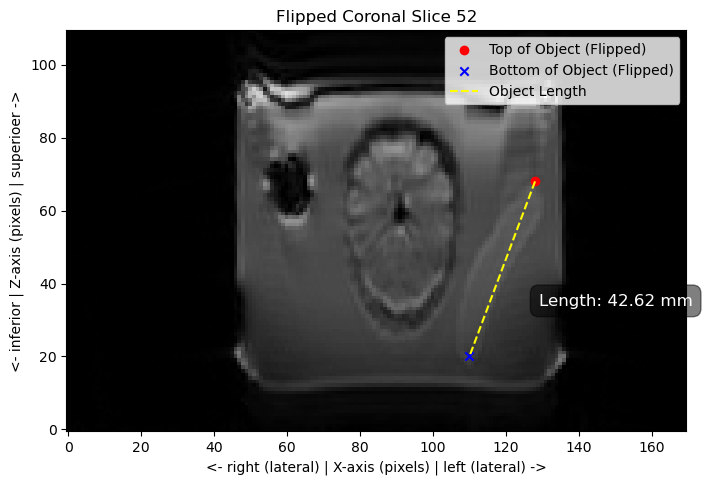

Distance between flipped points: 42.62 mm


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# ============================
# TASK: Plot Coronal Slice 52 with Two Points and Calculate Length
# ============================

# Assume that 'v1_coronal_all_slices' is already defined from your previous code
# If not, make sure to run the relevant part of your code first

# Define coronal slice index
coronal_slice_idx = 52

# Get the desired coronal slice
coronal_slice = v1_coronal_all_slices[coronal_slice_idx]

# ============================
# Flip the Coronal Slice Horizontally
# ============================

# Flip the image from left to right (horizontally)
coronal_slice_flipped = np.flip(np.rot90(coronal_slice, k=1), axis=0)
print("Applied horizontal flip to the coronal slice.")

# ============================
# Define Two Points on the Object
# ============================

# Manual selection of points (replace these with your own coordinates)
# Original Points before flipping
original_point1 = (128, 110-42)  # (x1, z1)
original_point2 = (110, 110-90)  # (x2, z2)

# Get the width of the image to adjust x-coordinates after flipping
height, width = coronal_slice_flipped.shape  # height = z-axis, width = x-axis

# Function to flip x-coordinate
def flip_x(x, width):
    """
    Flips the x-coordinate horizontally based on image width.
    
    Parameters:
    - x (int or float): Original x-coordinate.
    - width (int): Width of the image in pixels.
    
    Returns:
    - float: Flipped x-coordinate.
    """
    return (width - 1) - x

# Adjust x-coordinates of the points after flipping
flipped_point1 = original_point1
flipped_point2 = original_point2

print(f"Original Points: {original_point1}, {original_point2}")
print(f"Flipped Points: {flipped_point1}, {flipped_point2}")

# ============================
# Plot the Flipped Coronal Slice with Adjusted Points
# ============================

plt.figure(figsize=(8, 8))
plt.imshow(coronal_slice_flipped, cmap='gray', origin='lower')
plt.title(f'Flipped Coronal Slice {coronal_slice_idx}')
plt.xlabel('<- right (lateral) | X-axis (pixels) | left (lateral) ->')
plt.ylabel('<- inferior | Z-axis (pixels) | superioer ->')

# Plot the flipped points
plt.scatter(flipped_point1[0], flipped_point1[1], color='red', marker='o', label='Top of Object (Flipped)')
plt.scatter(flipped_point2[0], flipped_point2[1], color='blue', marker='x', label='Bottom of Object (Flipped)')

# Draw a line between the two flipped points
plt.plot([flipped_point1[0], flipped_point2[0]], [flipped_point1[1], flipped_point2[1]],
         color='yellow', linestyle='--', label='Object Length')

# ============================
# Calculate the Physical Length
# ============================

# Pixel sizes in mm
pixel_size_x = 1.3    # mm per pixel on x-axis
pixel_size_z = 0.7422 # mm per pixel on z-axis

# Extract coordinates
x1, z1 = flipped_point1
x2, z2 = flipped_point2

# Calculate pixel differences
delta_x = x2 - x1
delta_z = z2 - z1

# Calculate the physical distance using Pythagorean theorem
distance_mm = np.sqrt((delta_x * pixel_size_x)**2 + (delta_z * pixel_size_z)**2)

# ============================
# Annotate the Plot with Length
# ============================

# Determine the midpoint for placing the annotation
mid_x = (x1 + x2) / 2
mid_z = (z1 + z2) / 2

# Offset for the text to prevent overlapping with the line
offset_x = 10  # pixels
offset_z = -10  # pixels

# Create annotation string
length_text = f'Length: {distance_mm:.2f} mm'

# Add text annotation to the plot
plt.text(mid_x + offset_x, mid_z + offset_z, length_text, color='white', fontsize=12,
         bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))

plt.legend()

# Show the plot with annotation
plt.show()

# Print the results in the console
print(f"Distance between flipped points: {distance_mm:.2f} mm")


In [34]:
coronal_slice.shape

(170, 110)

Uncertainty of Material 3

In [35]:
import numpy as np

# ============================
# Define two points on the object
# ============================

# Coordinates of the two points (as per your previous code)
point1 = (128, 42)  # (x1, z1)
point2 = (110, 90)  # (x2, z2)

# Pixel sizes in mm
pixel_size_x = 1.3    # mm per pixel on x-axis
pixel_size_z = 0.7422 # mm per pixel on z-axis

# Extract coordinates
x1, z1 = point1
x2, z2 = point2

# Calculate pixel differences
delta_x_pixels = x2 - x1  # In pixels
delta_z_pixels = z2 - z1  # In pixels

# Convert pixel differences to millimeters
delta_x_mm = delta_x_pixels * pixel_size_x
delta_z_mm = delta_z_pixels * pixel_size_z

# Calculate the physical distance
distance_mm = np.sqrt(delta_x_mm**2 + delta_z_mm**2)

# ============================
# Calculate uncertainties
# ============================

# Uncertainties in position measurements
delta_x_uncertainty_mm = np.sqrt((1.0)**2 + (1.0)**2)  # mm
delta_z_uncertainty_mm = np.sqrt((0.53)**2 + (0.53)**2)  # mm

# Partial derivatives
partial_L_wrt_dx = delta_x_mm / distance_mm
partial_L_wrt_dz = delta_z_mm / distance_mm

# Calculate the uncertainty in length
delta_L = np.sqrt(
    (partial_L_wrt_dx * delta_x_uncertainty_mm)**2 +
    (partial_L_wrt_dz * delta_z_uncertainty_mm)**2
)

# Round the uncertainty to one significant figure
delta_L_rounded = round(delta_L, 1)

# Print the result with uncertainty
print(f"Length of object: {distance_mm:.1f} mm ± {delta_L_rounded:.1f} mm")

Length of object: 42.6 mm ± 1.0 mm


Length including shape of object

Total Length (in pixels): 52.30 pixels
Total Length: 44.48 mm


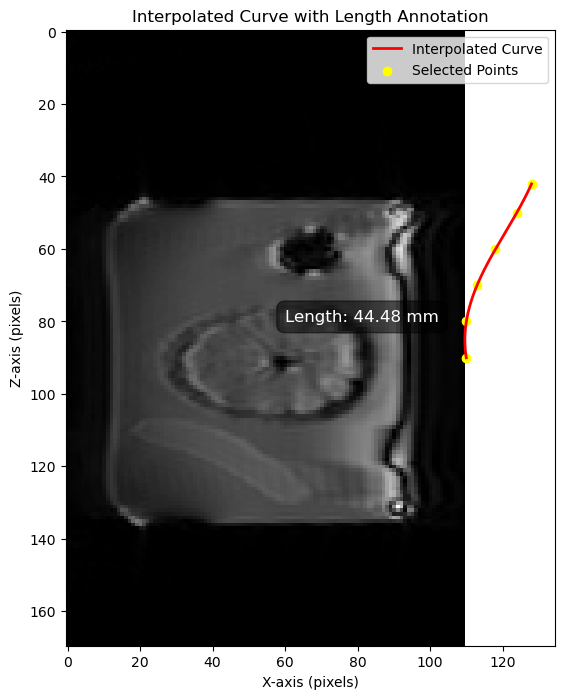

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# ============================
# Step 1: Interpolate the Curve
# ============================

# Manually defined points along the banana-shaped object
points = [
    (128, 42), (124, 50), (118, 60), (113, 70),
    (110, 80), (110, 90)
]

# Separate the points into x and z coordinates
x, z = zip(*points)

# Parameterize the points for spline interpolation
tck, u = splprep([x, z], s=2)  # Adjust 's' for smoothing as needed

# Generate a fine set of points along the spline
unew = np.linspace(0, 1.0, 1000)
x_new, z_new = splev(unew, tck)

# ============================
# Step 2: Calculate Distances
# ============================

# Calculate differences between consecutive interpolated points
dx = np.diff(x_new)
dz = np.diff(z_new)

# Calculate distances between points in pixels
distances_pixels = np.sqrt(dx**2 + dz**2)

# Sum distances to get total length in pixels
total_length_pixels = np.sum(distances_pixels)
print(f"Total Length (in pixels): {total_length_pixels:.2f} pixels")

# ============================
# Step 3: Convert to Millimeters
# ============================

# Define pixel sizes in mm
pixel_size_x = 1.3     # mm per pixel on X-axis
pixel_size_z = 0.7422  # mm per Z-axis

# Calculate the physical distance for each segment
physical_distances_mm = np.sqrt((dx * pixel_size_x)**2 + (dz * pixel_size_z)**2)

# Sum to get the total physical length
total_length_mm = np.sum(physical_distances_mm)
print(f"Total Length: {total_length_mm:.2f} mm")

# ============================
# Step 4: Plot the Interpolated Curve with Length Annotation
# ============================

# Assuming 'coronal_slice' and 'coronal_slice_idx' are already defined in your workspace
# If not, ensure you have loaded and defined them before running this code

plt.figure(figsize=(8, 8))
plt.imshow(coronal_slice, cmap='gray')
plt.plot(x_new, z_new, 'r-', linewidth=2, label='Interpolated Curve')
plt.scatter(x, z, color='yellow', marker='o', label='Selected Points')
plt.title('Interpolated Curve with Length Annotation')
plt.xlabel('X-axis (pixels)')
plt.ylabel('Z-axis (pixels)')

# Annotate the total length on the plot
# Adjust the coordinates (60, 80) as needed to place the text appropriately
plt.text(60, 80, f'Length: {total_length_mm:.2f} mm', color='white',
         fontsize=12, bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))

plt.legend()
plt.show()


Total Length (in pixels): 52.30 pixels
Total Length: 44.48 mm


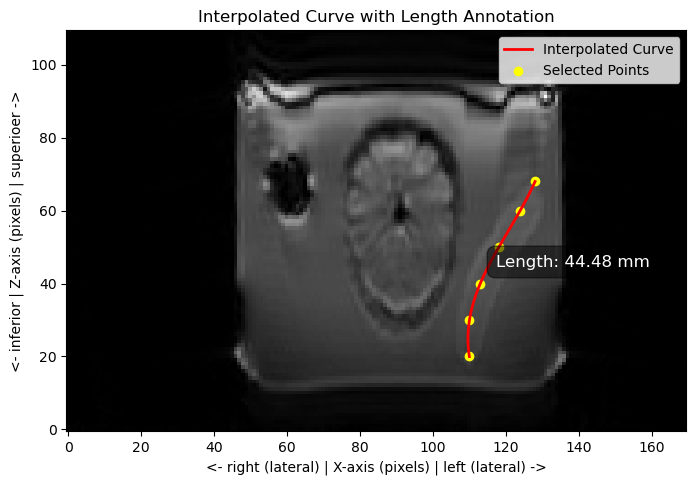

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# ============================
# Step 1: Interpolate the Curve
# ============================

# Manually defined points along the banana-shaped object
points = [
    (128, 110-42), (124, 110-50), (118, 110-60), (113, 110-70),
    (110, 110-80), (110, 110-90)
]

# Separate the points into x and z coordinates
x, z = zip(*points)

# Parameterize the points for spline interpolation
tck, u = splprep([x, z], s=2)  # Adjust 's' for smoothing as needed

# Generate a fine set of points along the spline
unew = np.linspace(0, 1.0, 1000)
x_new, z_new = splev(unew, tck)

# ============================
# Step 2: Calculate Distances
# ============================

# Calculate differences between consecutive interpolated points
dx = np.diff(x_new)
dz = np.diff(z_new)

# Calculate distances between points in pixels
distances_pixels = np.sqrt(dx**2 + dz**2)

# Sum distances to get total length in pixels
total_length_pixels = np.sum(distances_pixels)
print(f"Total Length (in pixels): {total_length_pixels:.2f} pixels")

# ============================
# Step 3: Convert to Millimeters
# ============================

# Define pixel sizes in mm
pixel_size_x = 1.3     # mm per pixel on X-axis
pixel_size_z = 0.7422  # mm per Z-axis

# Calculate the physical distance for each segment
physical_distances_mm = np.sqrt((dx * pixel_size_x)**2 + (dz * pixel_size_z)**2)

# Sum to get the total physical length
total_length_mm = np.sum(physical_distances_mm)
print(f"Total Length: {total_length_mm:.2f} mm")

# ============================
# Step 4: Plot the Interpolated Curve with Length Annotation
# ============================

# Assuming 'coronal_slice' and 'coronal_slice_idx' are already defined in your workspace
# If not, ensure you have loaded and defined them before running this code

plt.figure(figsize=(8, 8))
plt.imshow(np.flip(np.rot90(coronal_slice, k=3), axis=1), cmap='gray', origin='lower')  # Ensure Cartesian coordinate system
plt.plot(x_new, z_new, 'r-', linewidth=2, label='Interpolated Curve')
plt.scatter(x, z, color='yellow', marker='o', label='Selected Points')
plt.title('Interpolated Curve with Length Annotation')
plt.xlabel('<- right (lateral) | X-axis (pixels) | left (lateral) ->')
plt.ylabel('<- inferior | Z-axis (pixels) | superioer ->')

# Annotate the total length on the plot
# Adjust the coordinates (60, 80) as needed to place the text appropriately
annotation_x = np.mean(x)  # Centralize annotation along X
annotation_z = np.mean(z)  # Centralize annotation along Z
plt.text(annotation_x, annotation_z, f'Length: {total_length_mm:.2f} mm', color='white',
         fontsize=12, bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.5'))

plt.legend()
plt.show()


# T1 & T2

In [38]:
import os
import json
import numpy as np  # Essential for image transformations
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ============================
# Function to Load JSON Metadata
# ============================
def load_metadata(json_path):
    with open(json_path, 'r') as f:
        metadata = json.load(f)
    return metadata

# ============================
# Function to Load NIfTI Image
# ============================
def load_nifti_image(nifti_path):
    img = nib.load(nifti_path)
    data = img.get_fdata()
    return data

# ============================
# Define File Paths
# ============================
folder_path = 'A5B5_T1wT2w'  # Ensure this folder is in the same directory as your notebook

# T1 Files
t1_json_file = '3D_T1w_20240920074836_A5B5.json'
t1_nifti_file = '3D_T1w_20240920074836_A5B5.nii.gz'

# T2 Files
t2_json_file = '3D_T2w_20240920074836_A5B5.json'
t2_nifti_file = '3D_T2w_20240920074836_A5B5.nii.gz'

# ============================
# Load Metadata and Images
# ============================
# Load T1 Metadata and Image
t1_metadata_path = os.path.join(folder_path, t1_json_file)
t1_nifti_path = os.path.join(folder_path, t1_nifti_file)

if not os.path.exists(t1_metadata_path):
    raise FileNotFoundError(f"Metadata file not found: {t1_metadata_path}")
if not os.path.exists(t1_nifti_path):
    raise FileNotFoundError(f"NIfTI file not found: {t1_nifti_path}")

t1_metadata = load_metadata(t1_metadata_path)
t1_img = load_nifti_image(t1_nifti_path)

# Load T2 Metadata and Image
t2_metadata_path = os.path.join(folder_path, t2_json_file)
t2_nifti_path = os.path.join(folder_path, t2_nifti_file)

if not os.path.exists(t2_metadata_path):
    raise FileNotFoundError(f"Metadata file not found: {t2_metadata_path}")
if not os.path.exists(t2_nifti_path):
    raise FileNotFoundError(f"NIfTI file not found: {t2_nifti_path}")

t2_metadata = load_metadata(t2_metadata_path)
t2_img = load_nifti_image(t2_nifti_path)

# ============================
# Function to Add Anatomical Labels
# ============================
def add_anatomical_labels(ax, orientation):
    """
    Adds manually written labels and arrows to the plot based on the orientation.
    
    Parameters:
    - ax (matplotlib.axes.Axes): The axes to annotate.
    - orientation (str): 'Sagittal', 'Coronal', or 'Axial'.
    """
    if orientation == 'Axial':
        # Axial: Left-Right (X-axis), Posterior-Anterior (Y-axis)
        # Right Label
        ax.text(-0.1, 0.5, 'Right (lateral)', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=90, color='blue')
        ax.annotate('', xy=(0, 0.5), xytext=(-0.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Left Label
        ax.text(1.1, 0.5, 'Left (lateral)', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=-90, color='blue')
        ax.annotate('', xy=(1, 0.5), xytext=(1.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Posterior Label
        ax.text(0.5, -0.1, 'Posterior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 0), xytext=(0.5, 0.05),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Anterior Label
        ax.text(0.5, 1.1, 'Anterior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 1), xytext=(0.5, 0.95),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
    
    elif orientation == 'Coronal':
        # Coronal: Superior-Inferior (Y-axis), Left-Right (X-axis)
        # Superior Label
        ax.text(0.5, -0.1, 'Inferior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 0), xytext=(0.5, 0.05),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Inferior Label
        ax.text(0.5, 1.3, 'Superior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 1), xytext=(0.5, 0.95),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Left Label
        ax.text(-0.1, 0.5, 'Right (lateral)', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=90, color='blue')
        ax.annotate('', xy=(0, 0.5), xytext=(-0.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Right Label
        ax.text(1.1, 0.5, 'Left (lateral)', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=-90, color='blue')
        ax.annotate('', xy=(1, 0.5), xytext=(1.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
    
    elif orientation == 'Sagittal':
        # Sagittal: Superior-Inferior (Y-axis), Anterior-Posterior (X-axis)
        ax.text(-0.1, 0.5, 'Inferior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=90, color='blue')
        ax.annotate('', xy=(0, 0.5), xytext=(-0.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        ax.text(1.1, 0.5, 'Superior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=-90, color='blue')
        ax.annotate('', xy=(1, 0.5), xytext=(1.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        ax.text(0.5, -0.1, 'Posterior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 0), xytext=(0.5, 0.05),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        ax.text(0.5, 1.1, 'Anterior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 1), xytext=(0.5, 0.95),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
    
    else:
        pass  # No labels for unknown orientations

# ============================
# Function to Create Interactive Slider Plot with Manual Axes Adjustment
# ============================
def create_slider_plot(image, orientation, modality, initial_slice=None):
    """
    Creates an interactive plot with a slider for the specified orientation and modality.
    Manually adjusts axes to ensure correct anatomical orientation.
    
    Parameters:
    - image (numpy.ndarray): 3D MRI data.
    - orientation (str): 'Sagittal', 'Coronal', or 'Axial'.
    - modality (str): 'T1-weighted' or 'T2-weighted'.
    - initial_slice (int, optional): The initial slice index for the slider. Defaults to the middle slice.
    
    Returns:
    - interactive_plot (ipywidgets.interactive): The interactive widget.
    """
    # Determine the number of slices based on orientation
    if orientation == 'Axial':
        num_slices = image.shape[0]
    elif orientation == 'Coronal':
        num_slices = image.shape[1]
    elif orientation == 'Sagittal':
        num_slices = image.shape[2]
    else:
        raise ValueError("Orientation must be 'Sagittal', 'Coronal', or 'Axial'.")

    # Set the initial slice to the middle slice if not provided
    if initial_slice is None:
        initial_slice = num_slices // 2
    else:
        # Validate the initial_slice
        if not (0 <= initial_slice < num_slices):
            raise ValueError(f"Initial slice {initial_slice} is out of bounds for {orientation} orientation with {num_slices} slices.")

    # Create slider with the specified initial value
    slice_slider = widgets.IntSlider(
        value=initial_slice,
        min=0,
        max=num_slices - 1,
        step=1,
        description=f'{modality} {orientation}:',
        continuous_update=False
    )
    
    # Define update function
    def update_plot(slice_idx):
        fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)
        
        if orientation == 'Axial':
            # Axial: slice along Z-axis (shape[0])
            slice_img = image[slice_idx, :, :]
            # Flip vertically to correct orientation
            slice_img = np.flip(np.rot90(slice_img), axis=0)
            # Transpose for correct display
            slice_img = slice_img.T
            im = ax.imshow(slice_img, cmap='gray', origin='lower')
        elif orientation == 'Coronal':
            # Coronal: slice along Y-axis (shape[1])
            slice_img = image[:, slice_idx, :]
            # Rotate 90 degrees counter-clockwise
            slice_img = np.rot90(slice_img, k=0)
            im = ax.imshow(slice_img, cmap='gray', origin='lower')
        elif orientation == 'Sagittal':
            # Sagittal: slice along X-axis (shape[2])
            slice_img = image[:, :, slice_idx]
            # Flip horizontally to correct orientation
            slice_img = slice_img
            # Transpose for correct display
            slice_img = slice_img.T
            im = ax.imshow(slice_img, cmap='gray', origin='lower')
        
        ax.set_title(f'{modality} - {orientation} Slice {slice_idx}', fontsize=12)
        ax.axis('off')  # Hide axis ticks for clarity
        
        # Add anatomical labels
        add_anatomical_labels(ax, orientation)
        
        # Create colorbar in a separate axes to prevent overlapping
        cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label('Intensity', rotation=270, labelpad=15, fontsize=10)
        
        plt.show()
    
    # Link slider to update function
    interactive_plot = widgets.interactive(update_plot, slice_idx=slice_slider)
    
    return interactive_plot

# ============================
# Create Interactive Plots with Specified Initial Slices
# ============================

# Create a list to hold all interactive widgets
plots = []

# Define initial slices for each plot (replace these with your desired slice indices)
initial_slices = {
    ('Axial', 'T1-weighted'): 59,
    ('Axial', 'T2-weighted'): 59,
    ('Coronal', 'T1-weighted'): 257,
    ('Coronal', 'T2-weighted'): 257,
    ('Sagittal', 'T1-weighted'): 246,
    ('Sagittal', 'T2-weighted'): 246
}

# Add each plot to the list with specified initial slice
for orientation, modality in [
    ('Axial', 'T1-weighted'),
    ('Axial', 'T2-weighted'),
    ('Coronal', 'T1-weighted'),
    ('Coronal', 'T2-weighted'),
    ('Sagittal', 'T1-weighted'),
    ('Sagittal', 'T2-weighted')
]:
    # Determine the image based on modality
    image = t1_img if 'T1' in modality else t2_img
    # Get the initial slice; default to middle slice if not specified
    initial_slice = initial_slices.get((orientation, modality), None)
    # Append the interactive plot
    plots.append(create_slider_plot(image, orientation, modality, initial_slice=initial_slice))

# Combine all plots into a vertical box layout
all_plots = widgets.VBox(plots)

# Display all plots
display(all_plots)


cropped down below

In [39]:
import os
import json
import numpy as np  # Essential for image transformations
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# ============================
# Function to Load JSON Metadata
# ============================
def load_metadata(json_path):
    with open(json_path, 'r') as f:
        metadata = json.load(f)
    return metadata

# ============================
# Function to Load NIfTI Image
# ============================
def load_nifti_image(nifti_path):
    img = nib.load(nifti_path)
    data = img.get_fdata()
    return data

# ============================
# Define File Paths
# ============================
folder_path = 'A5B5_T1wT2w'  # Ensure this folder is in the same directory as your notebook

# T1 Files
t1_json_file = '3D_T1w_20240920074836_A5B5.json'
t1_nifti_file = '3D_T1w_20240920074836_A5B5.nii.gz'

# T2 Files
t2_json_file = '3D_T2w_20240920074836_A5B5.json'
t2_nifti_file = '3D_T2w_20240920074836_A5B5.nii.gz'

# ============================
# Load Metadata and Images
# ============================
# Load T1 Metadata and Image
t1_metadata_path = os.path.join(folder_path, t1_json_file)
t1_nifti_path = os.path.join(folder_path, t1_nifti_file)

if not os.path.exists(t1_metadata_path):
    raise FileNotFoundError(f"Metadata file not found: {t1_metadata_path}")
if not os.path.exists(t1_nifti_path):
    raise FileNotFoundError(f"NIfTI file not found: {t1_nifti_path}")

t1_metadata = load_metadata(t1_metadata_path)
t1_img = load_nifti_image(t1_nifti_path)

# Load T2 Metadata and Image
t2_metadata_path = os.path.join(folder_path, t2_json_file)
t2_nifti_path = os.path.join(folder_path, t2_nifti_file)

if not os.path.exists(t2_metadata_path):
    raise FileNotFoundError(f"Metadata file not found: {t2_metadata_path}")
if not os.path.exists(t2_nifti_path):
    raise FileNotFoundError(f"NIfTI file not found: {t2_nifti_path}")

t2_metadata = load_metadata(t2_metadata_path)
t2_img = load_nifti_image(t2_nifti_path)

# ============================
# Function to Add Anatomical Labels
# ============================
def add_anatomical_labels(ax, orientation):
    """
    Adds manually written labels and arrows to the plot based on the orientation.
    
    Parameters:
    - ax (matplotlib.axes.Axes): The axes to annotate.
    - orientation (str): 'Sagittal', 'Coronal', or 'Axial'.
    """
    if orientation == 'Axial':
        # Axial: Left-Right (X-axis), Posterior-Anterior (Y-axis)
        # Right Label
        ax.text(-0.1, 0.5, 'Right (lateral)', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=90, color='blue')
        ax.annotate('', xy=(0, 0.5), xytext=(-0.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Left Label
        ax.text(1.1, 0.5, 'Left (lateral)', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=-90, color='blue')
        ax.annotate('', xy=(1, 0.5), xytext=(1.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Posterior Label
        ax.text(0.5, -0.1, 'Posterior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 0), xytext=(0.5, 0.05),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Anterior Label
        ax.text(0.5, 1.1, 'Anterior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 1), xytext=(0.5, 0.95),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
    
    elif orientation == 'Coronal':
        # Coronal: Superior-Inferior (Y-axis), Left-Right (X-axis)
        # Superior Label
        ax.text(0.5, -0.1, 'Inferior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 0), xytext=(0.5, 0.05),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Inferior Label
        ax.text(0.5, 1.3, 'Superior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 1), xytext=(0.5, 0.95),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Left Label
        ax.text(-0.1, 0.5, 'Right (lateral)', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=90, color='blue')
        ax.annotate('', xy=(0, 0.5), xytext=(-0.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        # Right Label
        ax.text(1.1, 0.5, 'Left (lateral)', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=-90, color='blue')
        ax.annotate('', xy=(1, 0.5), xytext=(1.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
    
    elif orientation == 'Sagittal':
        # Sagittal: Superior-Inferior (Y-axis), Anterior-Posterior (X-axis)
        ax.text(-0.1, 0.5, 'Inferior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=90, color='blue')
        ax.annotate('', xy=(0, 0.5), xytext=(-0.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        ax.text(1.1, 0.5, 'Superior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', rotation=-90, color='blue')
        ax.annotate('', xy=(1, 0.5), xytext=(1.05, 0.5),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        ax.text(0.5, -0.1, 'Posterior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 0), xytext=(0.5, 0.05),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
        
        ax.text(0.5, 1.1, 'Anterior', transform=ax.transAxes,
                fontsize=12, ha='center', va='center', color='blue')
        ax.annotate('', xy=(0.5, 1), xytext=(0.5, 0.95),
                    xycoords='axes fraction', textcoords='axes fraction',
                    arrowprops=dict(facecolor='blue', shrink=0.05))
    
    else:
        pass  # No labels for unknown orientations

# ============================
# Function to Create Interactive Slider Plot with Manual Axes Adjustment
# ============================
def create_slider_plot(image, orientation, modality, initial_slice=None):
    """
    Creates an interactive plot with a slider for the specified orientation and modality.
    Manually adjusts axes to ensure correct anatomical orientation.
    
    Parameters:
    - image (numpy.ndarray): 3D MRI data.
    - orientation (str): 'Sagittal', 'Coronal', or 'Axial'.
    - modality (str): 'T1-weighted' or 'T2-weighted'.
    - initial_slice (int, optional): The initial slice index for the slider. Defaults to the middle slice.
    
    Returns:
    - interactive_plot (ipywidgets.interactive): The interactive widget.
    """
    # Determine the number of slices based on orientation
    if orientation == 'Axial':
        num_slices = image.shape[0]
    elif orientation == 'Coronal':
        num_slices = image.shape[1]
    elif orientation == 'Sagittal':
        num_slices = image.shape[2]
    else:
        raise ValueError("Orientation must be 'Sagittal', 'Coronal', or 'Axial'.")

    # Set the initial slice to the middle slice if not provided
    if initial_slice is None:
        initial_slice = num_slices // 2
    else:
        # Validate the initial_slice
        if not (0 <= initial_slice < num_slices):
            raise ValueError(f"Initial slice {initial_slice} is out of bounds for {orientation} orientation with {num_slices} slices.")

    # Create slider with the specified initial value
    slice_slider = widgets.IntSlider(
        value=initial_slice,
        min=0,
        max=num_slices - 1,
        step=1,
        description=f'{modality} {orientation}:',
        continuous_update=False
    )
    
    # Define update function
    def update_plot(slice_idx):
        fig, ax = plt.subplots(figsize=(5,5), constrained_layout=True)
        
        if orientation == 'Axial':
            # Axial: slice along Z-axis (shape[0])
            slice_img = image[slice_idx, :, :]
            # Flip vertically to correct orientation
            slice_img = np.flip(np.rot90(slice_img), axis=0)
            # Transpose for correct display
            slice_img = slice_img.T
            im = ax.imshow(slice_img, cmap='gray', origin='lower')
        elif orientation == 'Coronal':
            # Coronal: slice along Y-axis (shape[1])
            slice_img = image[:, slice_idx, :]
            # Rotate 90 degrees counter-clockwise
            slice_img = np.rot90(slice_img, k=0)[:120,:]
            im = ax.imshow(slice_img, cmap='gray', origin='lower')
        elif orientation == 'Sagittal':
            # Sagittal: slice along X-axis (shape[2])
            slice_img = image[:, :, slice_idx]
            # Flip horizontally to correct orientation
            slice_img = slice_img[:120,:]
            # Transpose for correct display
            slice_img = slice_img.T
            im = ax.imshow(slice_img, cmap='gray', origin='lower')
        
        ax.set_title(f'{modality} - {orientation} Slice {slice_idx}', fontsize=12)
        ax.axis('off')  # Hide axis ticks for clarity
        
        # Add anatomical labels
        add_anatomical_labels(ax, orientation)
        
        # Create colorbar in a separate axes to prevent overlapping
        cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label('Intensity', rotation=270, labelpad=15, fontsize=10)
        
        plt.show()
    
    # Link slider to update function
    interactive_plot = widgets.interactive(update_plot, slice_idx=slice_slider)
    
    return interactive_plot

# ============================
# Create Interactive Plots with Specified Initial Slices
# ============================

# Create a list to hold all interactive widgets
plots = []

# Define initial slices for each plot (replace these with your desired slice indices)
initial_slices = {
    ('Axial', 'T1-weighted'): 59,
    ('Axial', 'T2-weighted'): 59,
    ('Coronal', 'T1-weighted'): 257,
    ('Coronal', 'T2-weighted'): 257,
    ('Sagittal', 'T1-weighted'): 246,
    ('Sagittal', 'T2-weighted'): 246
}

# Add each plot to the list with specified initial slice
for orientation, modality in [
    ('Axial', 'T1-weighted'),
    ('Axial', 'T2-weighted'),
    ('Coronal', 'T1-weighted'),
    ('Coronal', 'T2-weighted'),
    ('Sagittal', 'T1-weighted'),
    ('Sagittal', 'T2-weighted')
]:
    # Determine the image based on modality
    image = t1_img if 'T1' in modality else t2_img
    # Get the initial slice; default to middle slice if not specified
    initial_slice = initial_slices.get((orientation, modality), None)
    # Append the interactive plot
    plots.append(create_slider_plot(image, orientation, modality, initial_slice=initial_slice))

# Combine all plots into a vertical box layout
all_plots = widgets.VBox(plots)

# Display all plots
display(all_plots)
